# Diffusion Based Graph Generating Methods


In [ ]:
# installing required packages
!pip install --upgrade pip setuptools wheel moses
!pip install torch torchvision networkx tqdm rdkit matplotlib networkx
!pip install ml-collections absl-py pandas tensorboard  fcd-torch torch_geometric torch_scatter
!pip install six

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
zinc_db = '/content/gdrive/MyDrive/CS683_Project/250k_rndm_zinc_drugs_clean_3.csv'


Mounted at /content/gdrive/


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/CS683_Project/CDGS/')

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python main.py --config configs/vp_zinc_cdgs.py --mode train --workdir exp/vpsde_zinc_cdgs_256 --config.training.n_iters 20000

2024-11-24 16:41:54.630389: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 16:41:54.661578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-24 16:41:54.673172: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 16:41:54.706558: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-24 16:41:56.786782: W tensorflow/compiler/tf2

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python main.py --config configs/vp_zinc_cdgs.py --mode eval --workdir exp/vpsde_zinc_cdgs_256 --config.eval.begin_ckpt 250 --config

2024-11-24 17:24:05.759384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 17:24:05.802972: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-24 17:24:05.818391: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 17:24:05.864235: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-24 17:24:08.523840: W tensorflow/compiler/tf2

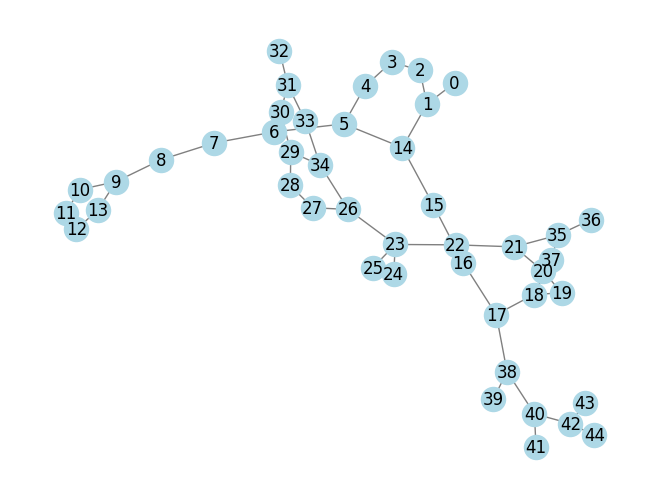

In [ ]:
import networkx as nx
from rdkit import Chem
from rdkit.Chem.rdmolops import GetAdjacencyMatrix

# Corrected SMILES string
smiles = "Cc1cccc(COCc2cc[nH]n2)c1C(CC(c1ccc(NS(=O)(=O)C2CCc3nn(C)cc32)c(Cl)c1)N(C)C(=O)N(C)C)"

# Generate RDKit molecule
mol = Chem.MolFromSmiles(smiles)

if mol:
    # Convert to NetworkX graph
    adj_matrix = GetAdjacencyMatrix(mol)
    G = nx.Graph(adj_matrix)

    # Visualize the graph
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
else:
    print("Failed to parse the SMILES string.")


In [ ]:
import pandas as pd

zinc_df = pd.read_csv(zinc_db)
zinc_df

,smiles,logP,qed,SAS
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,5.05060,0.702012,2.084095
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,3.11370,0.928975,3.432004
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182
...,...,...,...,...
249450,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc...,3.36790,0.745901,2.900726
249451,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,2.87430,0.799426,2.326627
249452,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1\n,2.90054,0.878086,1.840642
249453,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1\n,2.55624,0.852917,2.024638


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


# Score Based Diffusion

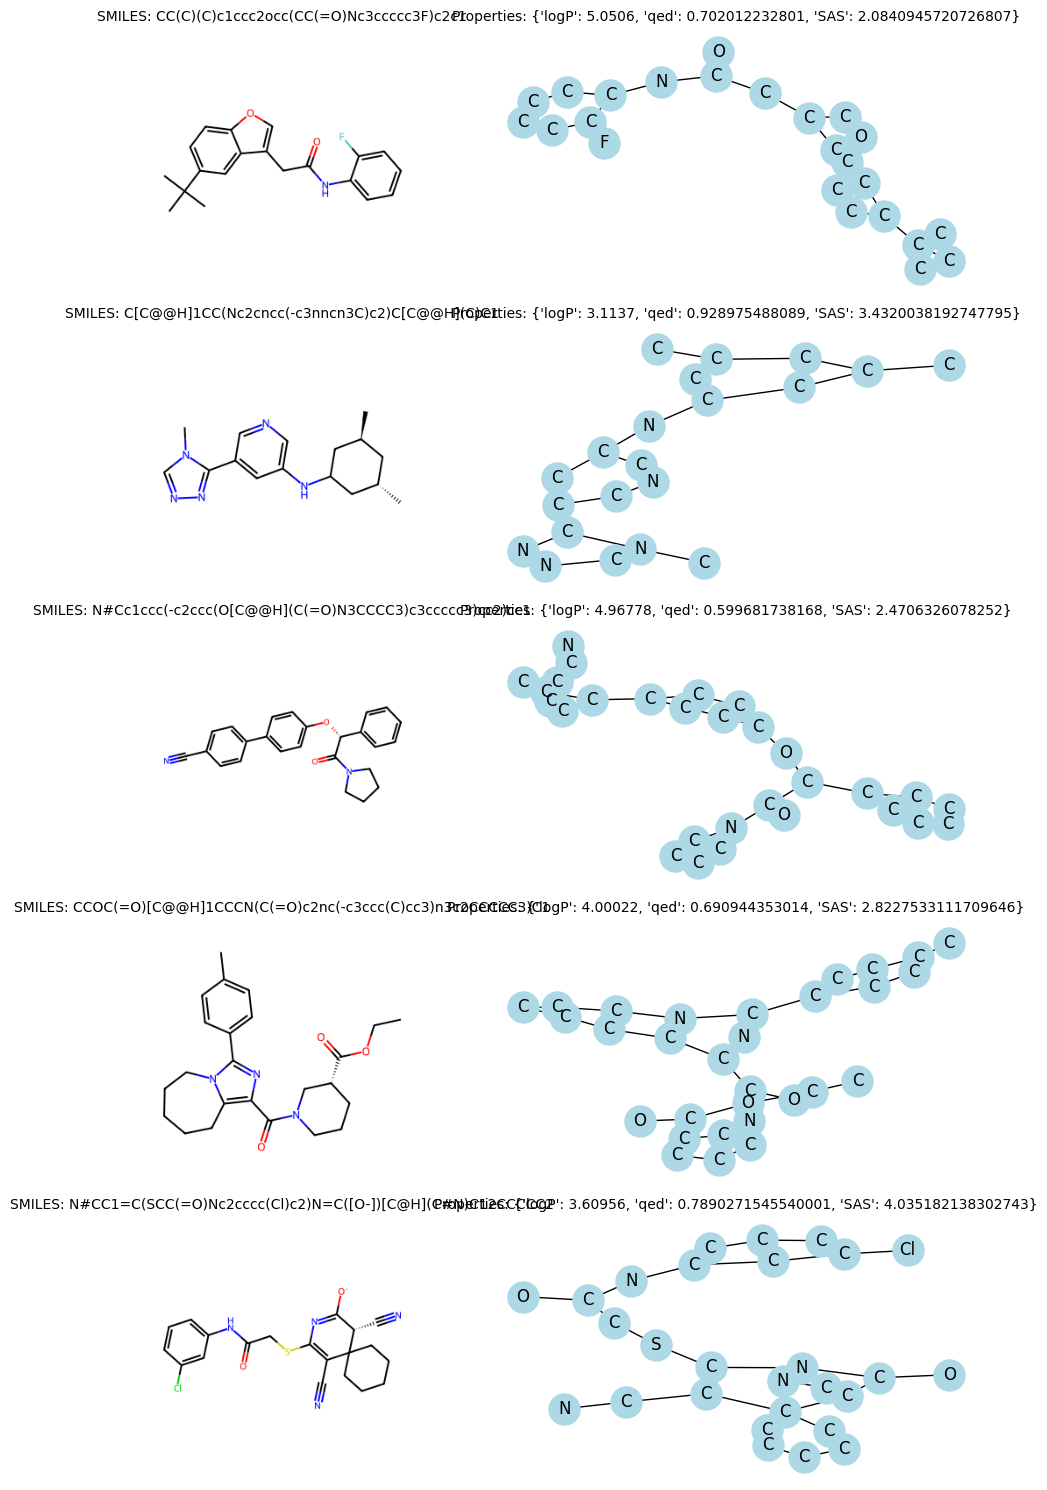

In [ ]:
# Printing example molecules

from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
import matplotlib.pyplot as plt

# Input: List of molecules with SMILES and properties
molecules = [
    {"smiles": "CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1", "logP": 5.0506, "qed": 0.702012232801, "SAS": 2.0840945720726807},
    {"smiles": "C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1", "logP": 3.1137, "qed": 0.928975488089, "SAS": 3.4320038192747795},
    {"smiles": "N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)cc2)cc1", "logP": 4.96778, "qed": 0.599681738168, "SAS": 2.4706326078252},
    {"smiles": "CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c2CCCCC3)C1", "logP": 4.00022, "qed": 0.690944353014, "SAS": 2.8227533111709646},
    {"smiles": "N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#N)C12CCCCC2", "logP": 3.60956, "qed": 0.7890271545540001, "SAS": 4.035182138302743},
]

# Function to create a NetworkX graph from an RDKit molecule
def mol_to_graph(mol):
    graph = nx.Graph()
    # Add atoms as nodes
    for atom in mol.GetAtoms():
        graph.add_node(
            atom.GetIdx(),
            element=atom.GetSymbol(),  # Atom type
        )
    # Add bonds as edges
    for bond in mol.GetBonds():
        graph.add_edge(
            bond.GetBeginAtomIdx(),
            bond.GetEndAtomIdx(),
            bond_type=bond.GetBondType().__str__(),  # Bond type
        )
    return graph

# Visualization of molecular graphs and properties
def visualize_molecules(molecules):
    fig, axes = plt.subplots(len(molecules), 2, figsize=(10, len(molecules) * 3))
    for i, molecule in enumerate(molecules):
        smiles = molecule["smiles"]
        properties = {k: v for k, v in molecule.items() if k != "smiles"}

        # Parse molecule
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            continue

        # Convert molecule to graph
        mol_graph = mol_to_graph(mol)

        # Draw molecule with RDKit
        img = Draw.MolToImage(mol, size=(300, 300))

        # Plot molecule image
        axes[i, 0].imshow(img)
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f"SMILES: {smiles}", fontsize=10)

        # Plot molecular graph with NetworkX
        pos = nx.spring_layout(mol_graph)
        nx.draw(
            mol_graph, pos, ax=axes[i, 1], with_labels=True,
            labels=nx.get_node_attributes(mol_graph, 'element'),
            node_size=500, node_color="lightblue"
        )
        axes[i, 1].set_title(f"Properties: {properties}", fontsize=10)

    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_molecules(molecules)


In [ ]:
# Using SDE

In [ ]:
"""All functions and modules related to model definition.
"""

import torch
import sde_lib
import numpy as np
from torch_scatter import scatter_min, scatter_max, scatter_mean, scatter_std


_MODELS = {}


def register_model(cls=None, *, name=None):
    """A decorator for registering model classes."""

    def _register(cls):
        if name is None:
            local_name = cls.__name__
        else:
            local_name = name
        if local_name in _MODELS:
            raise ValueError(f'Already registered model with name: {local_name}')
        _MODELS[local_name] = cls
        return cls

    if cls is None:
        return _register
    else:
        return _register(cls)


def get_model(name):
    return _MODELS[name]


def create_model(config):
    """Create the score model."""
    model_name = config.model.name
    score_model = get_model(model_name)(config)
    score_model = score_model.to(config.device)
    score_model = torch.nn.DataParallel(score_model)
    return score_model


def get_model_fn(model, train=False):
    """Create a function to give the output of the score-based model.

    Args:
        model: The score model.
        train: `True` for training and `False` for evaluation.

    Returns:
        A model function.
    """

    def model_fn(x, labels, *args, **kwargs):
        """Compute the output of the score-based model.

        Args:
            x: A mini-batch of input data (Adjacency matrices).
            labels: A mini-batch of conditioning variables for time steps. Should be interpreted differently
                for different models.
            mask: Mask for adjacency matrices.

        Returns:
            A tuple of (model output, new mutable states)
        """
        if not train:
            model.eval()
            return model(x, labels, *args, **kwargs)
        else:
            model.train()
            return model(x, labels, *args, **kwargs)

    return model_fn


def get_multi_score_fn(atom_sde, bond_sde, model, train=False, continuous=False):
    """Wraps `score_fn` so that the model output corresponds to a real time-dependent score function.

        Args:
            atom_sde: An `sde_lib.SDE` object that represents the forward SDE.
            bond_sde: An `sde_lib.SDE` object that represents the forward SDE.
            model: A score model.
            train: `True` for training and `False` for evaluation.
            continuous: If `True`, the score-based model is expected to directly take continuous time steps.

        Returns:
            A score function.
        """
    model_fn = get_model_fn(model, train=train)

    if isinstance(atom_sde, sde_lib.VPSDE) or isinstance(atom_sde, sde_lib.subVPSDE):
        def score_fn(x, t, *args, **kwargs):
            # Scale neural network output by standard deviation and flip sign
            if continuous or isinstance(sde, sde_lib.subVPSDE):
                # For VP-trained models, t=0 corresponds to the lowest noise level
                # The maximum value of time embedding is assumed to 999 for continuously-trained models.
                labels = t * 999
                atom_score, bond_score = model_fn(x, labels, *args, **kwargs)
                atom_std = atom_sde.marginal_prob(torch.zeros_like(x[0]), t)[1]
                bond_std = bond_sde.marginal_prob(torch.zeros_like(x[1]), t)[1]
            else:
                # For VP-trained models, t=0 corresponds to the lowest noise level
                labels = t * (sde.N - 1)
                atom_score, bond_score = model_fn(x, labels, *args, **kwargs)
                atom_std = atom_sde.sqrt_1m_alpha_cumprod.to(labels.device)[labels.long()]
                bond_std = bond_sde.sqrt_1m_alpha_cumprod.to(labels.device)[labels.long()]

            atom_score = -atom_score / atom_std[:, None, None]
            bond_score = -bond_score / bond_std[:, None, None, None]
            return atom_score, bond_score

    else:
        raise NotImplementedError(f"SDE class {sde.__class__.__name__} not yet supported.")

    return score_fn


def get_multi_theta_fn(atom_sde, bond_sde, model, train=False, continuous=False):
    """Wraps `theta_fn` so that the model output corresponds to a real time-dependent score function.

        Args:
            atom_sde: An `sde_lib.SDE` object that represents the forward SDE.
            bond_sde: An `sde_lib.SDE` object that represents the forward SDE.
            model: A score model.
            train: `True` for training and `False` for evaluation.
            continuous: If `True`, the score-based model is expected to directly take continuous time steps.

        Returns:
            A theta function.
        """
    model_fn = get_model_fn(model, train=train)

    if isinstance(atom_sde, sde_lib.VPSDE) or isinstance(atom_sde, sde_lib.subVPSDE):
        def theta_fn(x, t, *args, **kwargs):
            # Scale neural network output by standard deviation and flip sign
            if continuous or isinstance(sde, sde_lib.subVPSDE):
                # For VP-trained models, t=0 corresponds to the lowest noise level
                # The maximum value of time embedding is assumed to 999 for continuously-trained models.
                labels = t * 999
                atom_theta, bond_theta = model_fn(x, labels, *args, **kwargs)
            else:
                raise NotImplementedError()

            return atom_theta, bond_theta

    else:
        raise NotImplementedError(f"SDE class {sde.__class__.__name__} not yet supported.")

    return theta_fn


def get_mol_regressor_grad_fn(atom_sde, bond_sde, regressor_fn, norm=False):
    """Get the noise graph regressor gradient fn."""
    N = atom_sde.N - 1

    def mol_regressor_grad_fn(x, t, only_grad=False, std=False, *args, **kwargs):
        label = t * N
        atom_std = atom_sde.marginal_prob(torch.zeros_like(x[0]), t)[1]
        bond_std = bond_sde.marginal_prob(torch.zeros_like(x[1]), t)[1]

        with torch.enable_grad():
            atom_in, bond_in = x
            atom_in = atom_in.detach().requires_grad_(True)
            bond_in = bond_in.detach().requires_grad_(True)
            pred = regressor_fn((atom_in, bond_in), label, *args, **kwargs)
            try:
                atom_grad, bond_grad = torch.autograd.grad(pred.sum(), [atom_in, bond_in])
            except:
                print('WARNING: grad error!')
                atom_grad = torch.zeros_like(atom_in)
                bond_grad = torch.zeros_like(bond_in)

        # multiply mask, std
        atom_grad = atom_grad * kwargs['atom_mask'].unsqueeze(-1)
        bond_grad = bond_grad * kwargs['bond_mask']

        if only_grad:
            if std:
                return atom_grad, bond_grad, atom_std, bond_std
            return atom_grad, bond_grad

        atom_norm = torch.norm(atom_grad.reshape(atom_grad.shape[0], -1), dim=-1)
        bond_norm = torch.norm(bond_grad.reshape(bond_grad.shape[0], -1), dim=-1)

        if norm:
            atom_grad = atom_grad / (atom_norm + 1e-8)[:, None, None]
            bond_grad = bond_grad / (bond_norm + 1e-8)[:, None, None, None]

        atom_grad = - atom_std[:, None, None] * atom_grad
        bond_grad = - bond_std[:, None, None, None] * bond_grad
        return atom_grad, bond_grad

    return mol_regressor_grad_fn


def get_guided_theta_fn(theta_fn, regressor_grad_fn, guidance_scale=1.0):
    """theta function with gradient guidance."""
    def guided_theta_fn(x, t, *args, **kwargs):
        atom_theta, bond_theta = theta_fn(x, t, *args, **kwargs)
        atom_grad, bond_grad = regressor_grad_fn(x, t, *args, **kwargs)

        # atom_grad, bond_grad, atom_norm, bond_norm, atom_std, bond_std = regressor_grad_fn(x, t, True, *args, **kwargs)
        # atom_score = - atom_theta / atom_std[:, None, None]
        # atom_score_norm = torch.norm(atom_score.reshape(atom_score.shape[0], -1), dim=-1)
        # bond_score = - bond_theta / bond_std[:, None, None, None]
        # bond_score_norm = torch.norm(bond_score.reshape(bond_score.shape[0], -1), dim=-1)
        # atom_grad = - atom_std[:, None, None] * atom_grad * atom_score_norm[:, None, None] / (atom_norm + 1e-8)[:, None, None]
        # bond_grad = - bond_std[:, None, None, None] * bond_grad * bond_score_norm[:, None, None, None] / (bond_norm + 1e-8)[:, None, None, None]

        return atom_theta + atom_grad * guidance_scale, bond_theta + bond_grad * guidance_scale

    return guided_theta_fn


def get_theta_fn(sde, model, train=False, continuous=False):
    model_fn = get_model_fn(model, train=train)

    if isinstance(sde, sde_lib.VPSDE) or isinstance(sde, sde_lib.subVPSDE):
        def theta_fn(x, t, *args, **kwargs):
            # Scale neural network output by standard deviation and flip sign
            if continuous or isinstance(sde, sde_lib.subVPSDE):
                # For VP-trained models, t=0 corresponds to the lowest noise level
                # The maximum value of time embedding is assumed to 999 for continuously-trained models.
                labels = t * 999
                theta = model_fn(x, labels, *args, **kwargs)
            else:
                raise NotImplementedError()
            return theta
    else:
        raise NotImplementedError(f"SDE class {sde.__class__.__name__} not yet supported.")

    return theta_fn

@torch.no_grad()
def get_rw_feat(k_step, dense_adj):
    """Compute k_step Random Walk for given dense adjacency matrix."""

    rw_list = []
    deg = dense_adj.sum(-1, keepdims=True)
    AD = dense_adj / (deg + 1e-8)
    rw_list.append(AD)

    for _ in range(k_step):
        rw = torch.bmm(rw_list[-1], AD)
        rw_list.append(rw)
    rw_map = torch.stack(rw_list[1:], dim=1)  # [B, k_step, N, N]

    rw_landing = torch.diagonal(rw_map, offset=0, dim1=2, dim2=3)  # [B, k_step, N]
    rw_landing = rw_landing.permute(0, 2, 1)  # [B, N, rw_depth]

    # get the shortest path distance indices
    tmp_rw = rw_map.sort(dim=1)[0]
    spd_ind = (tmp_rw <= 0).sum(dim=1)  # [B, N, N]

    spd_onehot = torch.nn.functional.one_hot(spd_ind, num_classes=k_step+1).to(torch.float)
    spd_onehot = spd_onehot.permute(0, 3, 1, 2)  # [B, kstep, N, N]

    return rw_landing, spd_onehot


In [ ]:
import math
from typing import Union, Tuple, Optional
from torch_geometric.typing import PairTensor, Adj, OptTensor

import torch
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
from torch.nn import Linear
from torch_scatter import scatter
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.utils import softmax


class EdgeGateTransLayer(MessagePassing):
    """The version of edge feature gating."""

    _alpha: OptTensor

    def __init__(self, x_channels: int, out_channels: int,
                 heads: int = 1, dropout: float = 0., edge_dim: Optional[int] = None,
                 bias: bool = True, **kwargs):
        kwargs.setdefault('aggr', 'add')
        super(EdgeGateTransLayer, self).__init__(node_dim=0, **kwargs)

        self.x_channels = x_channels
        self.in_channels = in_channels = x_channels
        self.out_channels = out_channels
        self.heads = heads
        self.dropout = dropout
        self.edge_dim = edge_dim

        self.lin_key = Linear(in_channels, heads * out_channels, bias=bias)
        self.lin_query = Linear(in_channels, heads * out_channels, bias=bias)
        self.lin_value = Linear(in_channels, heads * out_channels, bias=bias)

        self.lin_edge0 = Linear(edge_dim, heads * out_channels, bias=False)
        self.lin_edge1 = Linear(edge_dim, heads * out_channels, bias=False)

        self.reset_parameters()

    def reset_parameters(self):
        self.lin_key.reset_parameters()
        self.lin_query.reset_parameters()
        self.lin_value.reset_parameters()
        self.lin_edge0.reset_parameters()
        self.lin_edge1.reset_parameters()

    def forward(self, x: OptTensor,
                edge_index: Adj,
                edge_attr: OptTensor = None
                ) -> Tensor:
        """"""

        H, C = self.heads, self.out_channels

        x_feat = x
        query = self.lin_query(x_feat).view(-1, H, C)
        key = self.lin_key(x_feat).view(-1, H, C)
        value = self.lin_value(x_feat).view(-1, H, C)

        # propagate_type: (x: PairTensor, edge_attr: OptTensor)
        out_x = self.propagate(edge_index, query=query, key=key, value=value, edge_attr=edge_attr, size=None)

        out_x = out_x.view(-1, self.heads * self.out_channels)

        return out_x

    def message(self, query_i: Tensor, key_j: Tensor, value_j: Tensor,
                edge_attr: OptTensor,
                index: Tensor, ptr: OptTensor,
                size_i: Optional[int]) -> Tuple[Tensor, Tensor]:

        edge_attn = self.lin_edge0(edge_attr).view(-1, self.heads, self.out_channels)
        edge_attn = torch.tanh(edge_attn)
        alpha = (query_i * key_j * edge_attn).sum(dim=-1) / math.sqrt(self.out_channels)

        alpha = softmax(alpha, index, ptr, size_i)
        alpha = F.dropout(alpha, p=self.dropout, training=self.training)

        # node feature message
        msg = value_j
        msg = msg * torch.tanh(self.lin_edge1(edge_attr).view(-1, self.heads, self.out_channels))
        msg = msg * alpha.view(-1, self.heads, 1)

        return msg

    def __repr__(self):
        return '{}({}, {}, heads={})'.format(self.__class__.__name__,
                                             self.in_channels,
                                             self.out_channels, self.heads)


In [ ]:
"""Common layers for defining score networks."""

import torch.nn as nn
import torch
import torch.nn.functional as F
import numpy as np
import math
import torch_geometric.nn as graph_nn


def get_act(config):
    """Get actiuvation functions from the config file."""

    if config.model.nonlinearity.lower() == 'elu':
        return nn.ELU()
    elif config.model.nonlinearity.lower() == 'relu':
        return nn.ReLU()
    elif config.model.nonlinearity.lower() == 'lrelu':
        return nn.LeakyReLU(negative_slope=0.2)
    elif config.model.nonlinearity.lower() == 'swish':
        return nn.SiLU()
    elif config.model.nonlinearity.lower() == 'tanh':
        return nn.Tanh()
    else:
        raise NotImplementedError('activation function does not exist!')


def conv1x1(in_planes, out_planes, stride=1, bias=True, dilation=1, padding=0):
    conv = nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=bias, dilation=dilation,
                     padding=padding)
    return conv


# from DDPM
def get_timestep_embedding(timesteps, embedding_dim, max_positions=10000):
    assert len(timesteps.shape) == 1
    half_dim = embedding_dim // 2
    # magic number 10000 is from transformers
    emb = math.log(max_positions) / (half_dim - 1)
    emb = torch.exp(torch.arange(half_dim, dtype=torch.float32, device=timesteps.device) * -emb)
    emb = timesteps.float()[:, None] * emb[None, :]
    emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)
    if embedding_dim % 2 == 1: # zero pad
        emb = F.pad(emb, (0, 1), mode='constant')
    assert emb.shape == (timesteps.shape[0], embedding_dim)
    return emb


In [ ]:
# utility functions such as restore checkpoint, conditions of adding noise
import torch
import os
import logging
import re
import copy
import numpy as np
import torch.nn.functional as F
import networkx as nx
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, rdMolDescriptors
from rdkit.Chem.Descriptors import MolLogP, qed
from sascorer import calculateScore

ATOM_VALENCY = {6: 4, 7: 3, 8: 2, 9: 1, 15: 3, 16: 2, 17: 1, 35: 1, 53: 1}
bond_decoder_m = {1: Chem.rdchem.BondType.SINGLE, 2: Chem.rdchem.BondType.DOUBLE, 3: Chem.rdchem.BondType.TRIPLE}


def restore_checkpoint(ckpt_dir, state, device):
    if not os.path.exists(ckpt_dir):
        if not os.path.exists(os.path.dirname(ckpt_dir)):
            os.makedirs(os.path.dirname(ckpt_dir))
        logging.warning(f"No checkpoint found at {ckpt_dir}. "
                        f"Returned the same state as input")
        return state
    else:
        loaded_state = torch.load(ckpt_dir, map_location=device)
        state['optimizer'].load_state_dict(loaded_state['optimizer'])
        state['model'].load_state_dict(loaded_state['model'], strict=False)
        state['ema'].load_state_dict(loaded_state['ema'])
        state['step'] = loaded_state['step']
        return state


def save_checkpoint(ckpt_dir, state):
    saved_state = {
        'optimizer': state['optimizer'].state_dict(),
        'model': state['model'].state_dict(),
        'ema': state['ema'].state_dict(),
        'step': state['step']
    }
    torch.save(saved_state, ckpt_dir)


@torch.no_grad()
def dense_mol(graph_data, scaler=None, dequantization=False):
    """Extract features and masks from PyG Dense DataBatch.

    Args:
        graph_data: DataBatch object.
            y: [B, 1] graph property values.
            num_atom: [B, 1] number of atoms in graphs.
            smile: [B] smile sequences.
            x: [B, max_node, channel1] atom type features.
            adj: [B, channel2, max_node, max_node] bond type features.
            atom_mask: [B, max_node]

    Returns:
        atom_feat: [B, max_node, channel1]
        atom_mask: [B, max_node]
        bond_feat: [B, channel2, max_node, max_node]
        bond_mask: [B, 1, max_node, max_node]
    """

    atom_feat = graph_data.x
    bond_feat = graph_data.adj
    atom_mask = graph_data.atom_mask
    if len(atom_mask.shape) == 1:
        atom_mask = atom_mask.unsqueeze(0)
    bond_mask = (atom_mask[:, None, :] * atom_mask[:, :, None]).unsqueeze(1)
    bond_mask = torch.tril(bond_mask, -1)
    bond_mask = bond_mask + bond_mask.transpose(-1, -2)

    if dequantization:
        atom_noise = torch.rand_like(atom_feat)
        atom_feat = (atom_feat + atom_noise) / 2. * atom_mask[:, :, None]
        bond_noise = torch.rand_like(bond_feat)
        bond_noise = torch.tril(bond_noise, -1)
        bond_noise = bond_noise + bond_noise.transpose(1, 2)
        bond_feat = (bond_feat + bond_noise) / 2. * bond_mask

    atom_feat = scaler(atom_feat, atom=True)
    bond_feat = scaler(bond_feat, atom=False)

    return atom_feat * atom_mask.unsqueeze(-1), atom_mask, bond_feat * bond_mask, bond_mask


def adj2graph(adj, sample_nodes):
    """Covert the PyTorch tensor adjacency matrices to numpy array.

    Args:
        adj: [Batch_size, channel, Max_node, Max_node], assume channel=1
        sample_nodes: [Batch_size]
    """
    adj_list = []
    # discretization
    adj[adj >= 0.5] = 1.
    adj[adj < 0.5] = 0.
    for i in range(adj.shape[0]):
        adj_tmp = adj[i, 0]
        # symmetric
        adj_tmp = torch.tril(adj_tmp, -1)
        adj_tmp = adj_tmp + adj_tmp.transpose(0, 1)
        # truncate
        adj_tmp = adj_tmp.cpu().numpy()[:sample_nodes[i], :sample_nodes[i]]
        adj_list.append(adj_tmp)

    return adj_list


def quantize_mol(adjs):
    # Quantize generated molecules [B, 1, N, N]
    adjs = adjs.squeeze(1)
    if type(adjs).__name__ == 'Tensor':
        adjs = adjs.detach().cpu()
    else:
        adjs = torch.tensor(adjs)
    adjs = adjs * 3
    adjs[adjs >= 2.5] = 3
    adjs[torch.bitwise_and(adjs >= 1.5, adjs < 2.5)] = 2
    adjs[torch.bitwise_and(adjs >= 0.5, adjs < 1.5)] = 1
    adjs[adjs < 0.5] = 0
    return np.array(adjs.to(torch.int64))


def quantize_mol_2(adjs):
    # Quantize generated molecules [B, 2, N, N]
    # The 2nd channel: 0 -> edge type; 1 -> edge existence
    if type(adjs).__name__ == 'Tensor':
        adjs = adjs.detach().cpu()
    else:
        adjs = torch.tensor(adjs)

    adj_0 = adjs[:, 0, :, :]
    adj_1 = adjs[:, 1, :, :]

    adj_0 = adj_0 * 3
    adj_0[adj_0 >= 2.5] = 3
    adj_0[torch.bitwise_and(adj_0 >= 1.5, adj_0 < 2.5)] = 2
    adj_0[torch.bitwise_and(adj_0 >= 0.5, adj_0 < 1.5)] = 1
    adj_0[adj_0 < 0.5] = 0

    adj_1[adj_1 < 0.5] = 0
    adj_1[adj_1 >= 0.5] = 1

    adjs = adj_0 * adj_1
    return np.array(adjs.to(torch.int64))


def construct_mol(x, A, num_node, atomic_num_list):
    mol = Chem.RWMol()
    atoms = np.argmax(x, axis=1)
    atoms = atoms[:num_node]

    for atom in atoms:
        mol.AddAtom(Chem.Atom(int(atomic_num_list[atom])))

    if len(A.shape) == 2:
        adj = A[:num_node, :num_node]
    elif A.shape[0] == 4:
        # A (edge_type, max_num_node, max_num_node)
        adj = np.argmax(A, axis=0)
        adj = np.array(adj)
        adj = adj[:num_node, :num_node]

        # Note. 3 means no existing edge (when constructing adj matrices)
        adj[adj == 3] = -1
        adj += 1
        adj = adj - np.eye(num_node)
    else:
        raise ValueError('Wrong Adj shape.')

    for start, end in zip(*np.nonzero(adj)):
        if start > end:
            mol.AddBond(int(start), int(end), bond_decoder_m[adj[start, end]])
            # remove formal charge for fair comparison with GraphAF, GraphDF, GraphCNF

            # add formal charge to atom: e.g. [O+], [N+], [S+], not support [O-], [N-], [NH+] etc.
            flag, atomid_valence = check_valency(mol)
            if flag:
                continue
            else:
                assert len(atomid_valence) == 2
                idx = atomid_valence[0]
                v = atomid_valence[1]
                an = mol.GetAtomWithIdx(idx).GetAtomicNum()
                if an in (7, 8, 16) and (v - ATOM_VALENCY[an]) == 1:
                    mol.GetAtomWithIdx(idx).SetFormalCharge(1)

    return mol


def check_valency(mol):
    """
    Checks that no atoms in the mol have exceeded their possible valency

    Return:
        True if no valency issues, False otherwise
    """
    try:
        Chem.SanitizeMol(mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_PROPERTIES)
        return True, None
    except ValueError as e:
        e = str(e)
        p = e.find('#')
        e_sub = e[p:]
        atomid_valence = list(map(int, re.findall(r'\d+', e_sub)))
        return False, atomid_valence


def correct_mol(mol):
    no_correct = False
    flag, _ = check_valency(mol)
    if flag:
        no_correct = True

    while True:
        flag, atomid_valence = check_valency(mol)
        if flag:
            break
        else:
            assert len(atomid_valence) == 2
            idx = atomid_valence[0]
            queue = []

            for b in mol.GetAtomWithIdx(idx).GetBonds():
                queue.append(
                    (b.GetIdx(), int(b.GetBondType()), b.GetBeginAtomIdx(), b.GetEndAtomIdx())
                )
            queue.sort(key=lambda tup: tup[1], reverse=True)

            if len(queue) > 0:
                start = queue[0][2]
                end = queue[0][3]
                t = queue[0][1] - 1
                mol.RemoveBond(start, end)
                if t >= 1:
                    mol.AddBond(start, end, bond_decoder_m[t])

    return mol, no_correct


def valid_mol_can_with_seg(x, largest_connected_comp=True):
    if x is None:
        return None
    sm = Chem.MolToSmiles(x, isomericSmiles=True)
    mol = Chem.MolFromSmiles(sm)
    if largest_connected_comp and '.' in sm:
        vsm = [(s, len(s)) for s in sm.split('.')]  # 'C.CC.CCc1ccc(N)cc1CCC=O'.split('.')
        vsm.sort(key=lambda tup: tup[1], reverse=True)
        mol = Chem.MolFromSmiles(vsm[0][0])
    return mol


def check_chemical_validity(mol):
    """
    Check the chemical validity of the mol object. Existing mol object is not modified.

    Args: mol: Rdkit mol object

    Return:
          True if chemically valid, False otherwise
    """

    s = Chem.MolToSmiles(mol, isomericSmiles=True)
    m = Chem.MolFromSmiles(s)  # implicitly performs sanitization
    if m:
        return True
    else:
        return False


def tensor2mol(x_atom, x_bond, num_atoms, atomic_num_list, correct_validity=True, largest_connected_comp=True):
    """Construct molecules from the atom and bond tensors.

    Args:
        x_atom: The node tensor [`number of samples`, `maximum number of atoms`, `number of possible atom types`].
        x_bond: The adjacency tensor [`number of samples`, `number of possible bond type`, `maximum number of atoms`,
            `maximum number of atoms`]
        num_atoms: The number of nodes for every sample [`number of samples`]
        atomic_num_list: A list to specify what each atom channel corresponds to.
        correct_validity: Whether to use the validity correction introduced by `MoFlow`.
        largest_connected_comp: Whether to use the largest connected component as the final molecule in the validity
            correction.

    Return:
        The list of Rdkit mol object. The check_chemical_validity rate without check.
    """
    if x_bond.shape[1] == 1:
        x_bond = quantize_mol(x_bond)
    elif x_bond.shape[1] == 2:
        x_bond = quantize_mol_2(x_bond)
    else:
        x_bond = x_bond.cpu().detach().numpy()

    x_atom = x_atom.cpu().detach().numpy()
    num_nodes = num_atoms.cpu().detach().numpy()

    gen_mols = []
    valid_cum = []

    for atom_elem, bond_elem, num_node in zip(x_atom, x_bond, num_nodes):
        mol = construct_mol(atom_elem, bond_elem, num_node, atomic_num_list)

        if correct_validity:
            # correct the invalid molecule
            cmol, no_correct = correct_mol(mol)
            if no_correct:
                valid_cum.append(1)
            else:
                valid_cum.append(0)
            vcmol = valid_mol_can_with_seg(cmol, largest_connected_comp=largest_connected_comp)
            gen_mols.append(vcmol)
        else:
            gen_mols.append(mol)

    return gen_mols, valid_cum


def penalized_logp(mol):
    """
    Calculate the reward that consists of log p penalized by SA and # long cycles,
    as described in (Kusner et al. 2017). Scores are normalized based on the
    statistics of 250k_rndm_zinc_drugs_clean.smi dataset.

    Args:
        mol: Rdkit mol object

    Returns:
        :class:`float`
    """

    # normalization constants, statistics from 250k_rndm_zinc_drugs_clean.smi
    logP_mean = 2.4570953396190123
    logP_std = 1.434324401111988
    SA_mean = -3.0525811293166134
    SA_std = 0.8335207024513095
    cycle_mean = -0.0485696876403053
    cycle_std = 0.2860212110245455

    log_p = MolLogP(mol)
    SA = -calculateScore(mol)

    # cycle score
    cycle_list = nx.cycle_basis(nx.Graph(
        Chem.rdmolops.GetAdjacencyMatrix(mol)))
    if len(cycle_list) == 0:
        cycle_length = 0
    else:
        cycle_length = max([len(j) for j in cycle_list])
    if cycle_length <= 6:
        cycle_length = 0
    else:
        cycle_length = cycle_length - 6
    cycle_score = -cycle_length

    normalized_log_p = (log_p - logP_mean) / logP_std
    normalized_SA = (SA - SA_mean) / SA_std
    normalized_cycle = (cycle_score - cycle_mean) / cycle_std

    return normalized_log_p + normalized_SA + normalized_cycle


def get_mol_qed(mol):
    return qed(mol)


def calculate_min_plogp(mol):
    """
    Calculate the reward that consists of log p penalized by SA and # long cycles,
    as described in (Kusner et al. 2017). Scores are normalized based on the
    statistics of 250k_rndm_zinc_drugs_clean.smi dataset.

    Args:
        mol: Rdkit mol object

    :rtype:
        :class:`float`
    """

    p1 = penalized_logp(mol)
    s1 = Chem.MolToSmiles(mol, isomericSmiles=True)
    s2 = Chem.MolToSmiles(mol, isomericSmiles=False)
    mol1 = Chem.MolFromSmiles(s1)
    mol2 = Chem.MolFromSmiles(s2)
    p2 = penalized_logp(mol1)
    p3 = penalized_logp(mol2)
    final_p = min(p1, p2)
    final_p = min(final_p, p3)
    return final_p


def reward_target_molecule_similarity(mol, target, radius=2, nBits=2048, useChirality=True):
    """
    Calculate the similarity, based on tanimoto similarity
    between the ECFP fingerprints of the x molecule and target molecule.

    Args:
        mol: Rdkit mol object
        target: Rdkit mol object

    Returns:
        :class:`float`, [0.0, 1.0]
    """
    x = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits, useChirality=useChirality)
    target = rdMolDescriptors.GetMorganFingerprintAsBitVect(target, radius=radius, nBits=nBits,
                                                            useChirality=useChirality)
    return DataStructs.TanimotoSimilarity(x, target)


def convert_radical_electrons_to_hydrogens(mol):
    """
    Convert radical electrons in a molecule into bonds to hydrogens. Only
    use this if molecule is valid. Return a new mol object.

    Args:
        mol: Rdkit mol object

    :rtype:
        Rdkit mol object
    """

    m = copy.deepcopy(mol)
    if Chem.Descriptors.NumRadicalElectrons(m) == 0:  # not a radical
        return m
    else:  # a radical
        print('converting radical electrons to H')
        for a in m.GetAtoms():
            num_radical_e = a.GetNumRadicalElectrons()
            if num_radical_e > 0:
                a.SetNumRadicalElectrons(0)
                a.SetNumExplicitHs(num_radical_e)
    return m


def get_final_smiles(mol):
    """
    Returns a SMILES of the final molecule. Converts any radical
    electrons into hydrogens. Works only if molecule is valid
    :return: SMILES
    """
    m = convert_radical_electrons_to_hydrogens(mol)
    return Chem.MolToSmiles(m, isomericSmiles=True)


def mols_to_nx(mols):
    nx_graphs = []
    for mol in mols:
        G = nx.Graph()

        for atom in mol.GetAtoms():
            G.add_node(atom.GetIdx(),
                       label=atom.GetSymbol())
            #    atomic_num=atom.GetAtomicNum(),
            #    formal_charge=atom.GetFormalCharge(),
            #    chiral_tag=atom.GetChiralTag(),
            #    hybridization=atom.GetHybridization(),
            #    num_explicit_hs=atom.GetNumExplicitHs(),
            #    is_aromatic=atom.GetIsAromatic())

        for bond in mol.GetBonds():
            G.add_edge(bond.GetBeginAtomIdx(),
                       bond.GetEndAtomIdx(),
                       label=int(bond.GetBondTypeAsDouble()))
            #    bond_type=bond.GetBondType())

        nx_graphs.append(G)
    return nx_graphs


In [ ]:
"""Abstract SDE classes, Reverse SDE, and VE/VP SDEs."""

import abc
import torch
import numpy as np


class SDE(abc.ABC):
    """SDE abstract class. Functions are designed for a mini-batch of inputs."""

    def __init__(self, N):
        """Construct an SDE.

        Args:
            N: number of discretization time steps.
        """
        super().__init__()
        self.N = N

    @property
    @abc.abstractmethod
    def T(self):
        """End time of the SDE."""
        pass

    @abc.abstractmethod
    def sde(self, x, t):
        pass

    @abc.abstractmethod
    def marginal_prob(self, x, t):
        """Parameters to determine the marginal distribution of the SDE, $p_t(x)$"""
        pass

    @abc.abstractmethod
    def prior_sampling(self, shape):
        """Generate one sample from the prior distribution, $p_T(x)$."""
        pass

    @abc.abstractmethod
    def prior_logp(self, z, mask):
        """Compute log-density of the prior distribution.

        Useful for computing the log-likelihood via probability flow ODE.

        Args:
            z: latent code
        Returns:
            log probability density
        """
        pass

    def discretize(self, x, t):
        """Discretize the SDE in the form: x_{i+1} = x_i + f_i(x_i) + G_i z_i.

        Useful for reverse diffusion sampling and probability flow sampling.
        Defaults to Euler-Maruyama discretization.

        Args:
            x: a torch tensor
            t: a torch float representing the time step (from 0 to `self.T`)

        Returns:
            f, G
        """
        dt = 1 / self.N
        drift, diffusion = self.sde(x, t)
        f = drift * dt
        G = diffusion * torch.sqrt(torch.tensor(dt, device=t.device))
        return f, G

    def reverse(self, score_fn, probability_flow=False):
        """Create the reverse-time SDE/ODE.

        Args:
            score_fn: A time-dependent score-based model that takes x and t and returns the score.
            probability_flow: If `True`, create the reverse-time ODE used for probability flow sampling.
        """

        N = self.N
        T = self.T
        sde_fn = self.sde
        discretize_fn = self.discretize

        # Build the class for reverse-time SDE.
        class RSDE(self.__class__):
            def __init__(self):
                self.N = N
                self.probability_flow = probability_flow

            @property
            def T(self):
                return T

            def sde(self, x, t, *args, **kwargs):
                """Create the drift and diffusion functions for the reverse SDE/ODE."""

                drift, diffusion = sde_fn(x, t)
                score = score_fn(x, t, *args, **kwargs)
                drift = drift - diffusion[:, None, None, None] ** 2 * score * (0.5 if self.probability_flow else 1.)
                # Set the diffusion function to zero for ODEs.
                diffusion = 0. if self.probability_flow else diffusion
                return drift, diffusion

            def sde_score(self, x, t, score):
                """Create the drift and diffusion functions for the reverse SDE/ODE, given score values."""
                drift, diffusion = sde_fn(x, t)
                if len(score.shape) == 4:
                    drift = drift - diffusion[:, None, None, None] ** 2 * score * (0.5 if self.probability_flow else 1.)
                elif len(score.shape) == 3:
                    drift = drift - diffusion[:, None, None] ** 2 * score * (0.5 if self.probability_flow else 1.)
                else:
                    raise ValueError
                diffusion = 0. if self.probability_flow else diffusion
                return drift, diffusion

            def discretize(self, x, t, *args, **kwargs):
                """Create discretized iteration rules for the reverse diffusion sampler."""
                f, G = discretize_fn(x, t)
                rev_f = f - G[:, None, None, None] ** 2 * score_fn(x, t, *args, **kwargs) * \
                        (0.5 if self.probability_flow else 1.)
                rev_G = torch.zeros_like(G) if self.probability_flow else G
                return rev_f, rev_G

            def discretize_score(self, x, t, score):
                """Create discretized iteration rules for the reverse diffusion sampler, given score values."""
                f, G = discretize_fn(x, t)
                if len(score.shape) == 4:
                    rev_f = f - G[:, None, None, None] ** 2 * score * \
                        (0.5 if self.probability_flow else 1.)
                elif len(score.shape) == 3:
                    rev_f = f - G[:, None, None] ** 2 * score * (0.5 if self.probability_flow else 1.)
                else:
                    raise ValueError
                rev_G = torch.zeros_like(G) if self.probability_flow else G
                return rev_f, rev_G

        return RSDE()


class VPSDE(SDE):
    def __init__(self, beta_min=0.1, beta_max=20, N=1000):
        """Construct a Variance Preserving SDE.

        Args:
            beta_min: value of beta(0)
            beta_max: value of beta(1)
            N: number of discretization steps
        """
        super().__init__(N)
        self.beta_0 = beta_min
        self.beta_1 = beta_max
        self.N = N
        self.discrete_betas = torch.linspace(beta_min / N, beta_max / N, N)
        self.alphas = 1. - self.discrete_betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        self.sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod)
        self.sqrt_1m_alphas_cumprod = torch.sqrt(1. - self.alphas_cumprod)

    @property
    def T(self):
        return 1

    def sde(self, x, t):
        beta_t = self.beta_0 + t * (self.beta_1 - self.beta_0)
        if len(x.shape) == 4:
            drift = -0.5 * beta_t[:, None, None, None] * x
        elif len(x.shape) == 3:
            drift = -0.5 * beta_t[:, None, None] * x
        else:
            raise NotImplementedError
        diffusion = torch.sqrt(beta_t)
        return drift, diffusion

    def marginal_prob(self, x, t):
        log_mean_coeff = -0.25 * t ** 2 * (self.beta_1 - self.beta_0) - 0.5 * t * self.beta_0
        if len(x.shape) == 4:
            mean = torch.exp(log_mean_coeff[:, None, None, None]) * x
        elif len(x.shape) == 3:
            mean = torch.exp(log_mean_coeff[:, None, None]) * x
        else:
            raise ValueError("The shape of x in marginal_prob is not correct.")
        std = torch.sqrt(1. - torch.exp(2. * log_mean_coeff))
        return mean, std

    def log_snr(self, t):
        log_mean_coeff = -0.25 * t ** 2 * (self.beta_1 - self.beta_0) - 0.5 * t * self.beta_0
        mean = torch.exp(log_mean_coeff)
        std = torch.sqrt(1. - torch.exp(2. * log_mean_coeff))
        log_snr = torch.log(mean / std)
        return log_snr, mean, std

    def log_snr_np(self, t):
        log_mean_coeff = -0.25 * t ** 2 * (self.beta_1 - self.beta_0) - 0.5 * t * self.beta_0
        mean = np.exp(log_mean_coeff)
        std = np.sqrt(1. - np.exp(2. * log_mean_coeff))
        log_snr = np.log(mean / std)
        return log_snr

    def lambda2t(self, lambda_ori):
        log_val = torch.log(torch.exp(-2. * lambda_ori) + 1.)
        t = 2. * log_val / (torch.sqrt(self.beta_0 ** 2 + 2. * (self.beta_1 - self.beta_0) * log_val) + self.beta_0)
        return t

    def lambda2t_np(self, lambda_ori):
        log_val = np.log(np.exp(-2. * lambda_ori) + 1.)
        t = 2. * log_val / (np.sqrt(self.beta_0 ** 2 + 2. * (self.beta_1 - self.beta_0) * log_val) + self.beta_0)
        return t

    def prior_sampling(self, shape):
        sample = torch.randn(*shape)
        if len(shape) == 4:
            sample = torch.tril(sample, -1)
            sample = sample + sample.transpose(-1, -2)

        return sample

    def prior_logp(self, z, mask):
        N = torch.sum(mask, dim=tuple(range(1, len(mask.shape))))
        logps = -N / 2. * np.log(2 * np.pi) - torch.sum((z * mask) ** 2, dim=(1, 2, 3)) / 2.
        return logps

    def discretize(self, x, t):
        """DDPM discretization."""
        timestep = (t * (self.N - 1) / self.T).long()
        beta = self.discrete_betas.to(x.device)[timestep]
        alpha = self.alphas.to(x.device)[timestep]
        sqrt_beta = torch.sqrt(beta)
        if len(x.shape) == 4:
            f = torch.sqrt(alpha)[:, None, None, None] * x - x
        elif len(x.shape) == 3:
            f = torch.sqrt(alpha)[:, None, None] * x - x
        else:
            NotImplementedError
        G = sqrt_beta
        return f, G


In [ ]:
"""Various sampling methods."""

import functools

import torch
import numpy as np
import abc

from models.utils import get_multi_score_fn
from scipy import integrate
# from torchdiffeq import odeint
import sde_lib
from models import utils as mutils
from dpm_solvers import get_mol_sampler_dpm1, get_mol_sampler_dpm2, get_mol_sampler_dpm3, \
    get_mol_sampler_dpm_mix, get_sampler_dpm3
import time


_CORRECTORS = {}
_PREDICTORS = {}


def register_predictor(cls=None, *, name=None):
    """A decorator for registering predictor classes."""

    def _register(cls):
        if name is None:
            local_name = cls.__name__
        else:
            local_name = name
        if local_name in _PREDICTORS:
            raise ValueError(f'Already registered predictor with name: {local_name}')
        _PREDICTORS[local_name] = cls
        return cls

    if cls is None:
        return _register
    else:
        return _register(cls)


def register_corrector(cls=None, *, name=None):
    """A decorator for registering corrector classes."""

    def _register(cls):
        if name is None:
            local_name = cls.__name__
        else:
            local_name = name
        if local_name in _CORRECTORS:
            raise ValueError(f'Already registered corrector with name: {local_name}')
        _CORRECTORS[local_name] = cls
        return cls

    if cls is None:
        return _register
    else:
        return _register(cls)


def get_predictor(name):
    return _PREDICTORS[name]


def get_corrector(name):
    return _CORRECTORS[name]


def get_mol_sampling_fn(config, atom_sde, bond_sde, atom_shape, bond_shape, inverse_scaler, eps):
    """Create a sampling function for molecule.

    Args:
        config: A `ml_collections.ConfigDict` object that contains all configuration information.
        atom_sde, bond_sde: A `sde_lib.SDE` object that represents the forward SDE.
        atom_shape, bond_shape: A sequence of integers representing the expected shape of a single sample.
        inverse_scaler: The inverse data normalizer function.
        eps: A `float` number. The reverse-time SDE is only integrated to `eps` for numerical stability.

    Returns:
        A function that takes random states and a replicated training state and outputs samples with the
      trailing dimensions matching `shape`.
    """

    sampler_name = config.sampling.method
    if sampler_name.lower() == 'dpm1':
        sampling_fn = get_mol_sampler_dpm1(atom_sde=atom_sde,
                                           bond_sde=bond_sde,
                                           atom_shape=atom_shape,
                                           bond_shape=bond_shape,
                                           inverse_scaler=inverse_scaler,
                                           time_step=config.sampling.ode_step,
                                           eps=eps,
                                           denoise=config.sampling.noise_removal,
                                           device=config.device)
    elif sampler_name.lower() == 'dpm2':
        sampling_fn = get_mol_sampler_dpm2(atom_sde=atom_sde,
                                           bond_sde=bond_sde,
                                           atom_shape=atom_shape,
                                           bond_shape=bond_shape,
                                           inverse_scaler=inverse_scaler,
                                           time_step=config.sampling.ode_step,
                                           eps=eps,
                                           denoise=config.sampling.noise_removal,
                                           device=config.device)
    elif sampler_name.lower() == 'dpm3':
        sampling_fn = get_mol_sampler_dpm3(atom_sde=atom_sde,
                                           bond_sde=bond_sde,
                                           atom_shape=atom_shape,
                                           bond_shape=bond_shape,
                                           inverse_scaler=inverse_scaler,
                                           time_step=config.sampling.ode_step,
                                           eps=eps,
                                           denoise=config.sampling.noise_removal,
                                           device=config.device)
    elif sampler_name.lower() == 'dpm_mix':
        sampling_fn = get_mol_sampler_dpm_mix(atom_sde=atom_sde,
                                              bond_sde=bond_sde,
                                              atom_shape=atom_shape,
                                              bond_shape=bond_shape,
                                              inverse_scaler=inverse_scaler,
                                              time_step=config.sampling.ode_step,
                                              eps=eps,
                                              denoise=config.sampling.noise_removal,
                                              device=config.device)
    # Predictor-Corrector sampling. Predictor-only and Corrector-only samplers are special cases.
    elif sampler_name.lower() == 'pc':

        predictor = get_predictor(config.sampling.predictor.lower())
        corrector = get_corrector(config.sampling.corrector.lower())

        sampling_fn = get_mol_pc_sampler(atom_sde=atom_sde,
                                         bond_sde=bond_sde,
                                         atom_shape=atom_shape,
                                         bond_shape=bond_shape,
                                         predictor=predictor,
                                         corrector=corrector,
                                         inverse_scaler=inverse_scaler,
                                         snr=(config.sampling.atom_snr, config.sampling.bond_snr),
                                         n_steps=config.sampling.n_steps_each,
                                         probability_flow=config.sampling.probability_flow,
                                         continuous=config.training.continuous,
                                         denoise=config.sampling.noise_removal,
                                         eps=eps,
                                         device=config.device)
    else:
        raise ValueError(f"Sampler name {sampler_name} unknown.")

    return sampling_fn


class Predictor(abc.ABC):
    """The abstract class for a predictor algorithm."""

    def __init__(self, sde, score_fn, probability_flow=False):
        super().__init__()
        self.sde = sde
        # Compute the reverse SDE/ODE
        if isinstance(sde, tuple):
            self.rsde = (sde[0].reverse(score_fn, probability_flow), sde[1].reverse(score_fn, probability_flow))
        else:
            self.rsde = sde.reverse(score_fn, probability_flow)
        self.score_fn = score_fn

    @abc.abstractmethod
    def update_fn(self, x, t, *args, **kwargs):
        """One update of the predictor.

        Args:
            x: A PyTorch tensor representing the current state.
            t: A PyTorch tensor representing the current time step.

        Returns:
            x: A PyTorch tensor of the next state.
            x_mean: A PyTorch tensor. The next state without random noise. Useful for denoising.
        """
        pass

    @abc.abstractmethod
    def update_mol_fn(self, x, t, *args, **kwargs):
        """One update of the predictor for molecule graphs.

        Args:
            x: A tuple of PyTorch tensor (x_atom, x_bond) representing the current state.
            t: A PyTorch tensor representing the current time step.

        Returns:
            x: A tuple of PyTorch tensor (x_atom, x_bond) of the next state.
            x_mean: A tuple of PyTorch tensor. The next state without random noise. Useful for denoising.
        """
        pass


class Corrector(abc.ABC):
    """The abstract class for a corrector algorithm."""

    def __init__(self, sde, score_fn, snr, n_steps):
        super().__init__()
        self.sde = sde
        self.score_fn = score_fn
        self.snr = snr
        self.n_steps = n_steps

    @abc.abstractmethod
    def update_fn(self, x, t, *args, **kwargs):
        """One update of the corrector.

        Args:
            x: A PyTorch tensor representing the current state.
            t: A PyTorch tensor representing the current time step.

        Returns:
            x: A PyTorch tensor of the next state.
            x_mean: A PyTorch tensor. The next state without random noise. Useful for denoising.
        """
        pass

    @abc.abstractmethod
    def update_mol_fn(self, x, t, *args, **kwargs):
        """One update of the corrector for molecule graphs.

        Args:
            x: A tuple of PyTorch tensor (x_atom, x_bond) representing the current state.
            t: A PyTorch tensor representing the current time step.

        Returns:
            x: A tuple of PyTorch tensor (x_atom, x_bond) of the next state.
            x_mean: A tuple of PyTorch tensor. The next state without random noise. Useful for denoising.
        """
        pass


@register_predictor(name='euler_maruyama')
class EulerMaruyamaPredictor(Predictor):
    def __init__(self, sde, score_fn, probability_flow=False):
        super().__init__(sde, score_fn, probability_flow)

    def update_fn(self, x, t, *args, **kwargs):
        dt = -1. / self.rsde.N
        z = torch.randn_like(x)
        z = torch.tril(z, -1)
        z = z + z.transpose(-1, -2)
        drift, diffusion = self.rsde.sde(x, t, *args, **kwargs)
        drift = torch.tril(drift, -1)
        drift = drift + drift.transpose(-1, -2)
        x_mean = x + drift * dt
        x = x_mean + diffusion[:, None, None, None] * np.sqrt(-dt) * z
        return x, x_mean

    def update_mol_fn(self, x, t, *args, **kwargs):
        atom_score, bond_score = self.score_fn(x, t, *args, **kwargs)
        # print('predictor atom norm: ', torch.norm(atom_score.reshape(atom_score.shape[0], -1), dim=-1).mean(), t[0])

        x_atom, x_bond = x
        dt = -1. / self.rsde[0].N

        # atom update
        z_atom = torch.randn_like(x_atom)
        drift_atom, diffusion_atom = self.rsde[0].sde_score(x_atom, t, atom_score)
        x_atom_mean = x_atom + drift_atom * dt
        x_atom = x_atom_mean + diffusion_atom[:, None, None] * np.sqrt(-dt) * z_atom

        # bond update
        z_bond = torch.randn_like(x_bond)
        z_bond = torch.tril(z_bond, -1)
        z_bond = z_bond + z_bond.transpose(-1, -2)
        drift_bond, diffusion_bond = self.rsde[1].sde_score(x_bond, t, bond_score)

        x_bond_mean = x_bond + drift_bond * dt
        x_bond = x_bond_mean + diffusion_bond[:, None, None, None] * np.sqrt(-dt) * z_bond

        return (x_atom, x_bond), (x_atom_mean, x_bond_mean)


@register_corrector(name='langevin')
class LangevinCorrector(Corrector):
    def __init__(self, sde, score_fn, snr, n_steps):
        super().__init__(sde, score_fn, snr, n_steps)

    def update_fn(self, x, t, *args, **kwargs):
        sde = self.sde
        score_fn = self.score_fn
        n_steps = self.n_steps
        target_snr = self.snr
        if isinstance(sde, sde_lib.VPSDE) or isinstance(sde, sde_lib.subVPSDE):
            timestep = (t * (sde.N - 1) / sde.T).long()
            # Note: it seems that subVPSDE doesn't set alphas
            alpha = sde.alphas.to(t.device)[timestep]
        else:
            alpha = torch.ones_like(t)

        for i in range(n_steps):

            grad = score_fn(x, t, *args, **kwargs)
            noise = torch.randn_like(x)

            noise = torch.tril(noise, -1)
            noise = noise + noise.transpose(-1, -2)

            mask = kwargs['mask']

            # mask invalid elements and calculate norm
            mask_tmp = mask.reshape(mask.shape[0], -1)

            grad_norm = torch.norm(mask_tmp * grad.reshape(grad.shape[0], -1), dim=-1).mean()
            noise_norm = torch.norm(mask_tmp * noise.reshape(noise.shape[0], -1), dim=-1).mean()

            step_size = (target_snr * noise_norm / grad_norm) ** 2 * 2 * alpha
            x_mean = x + step_size[:, None, None, None] * grad
            x = x_mean + torch.sqrt(step_size * 2)[:, None, None, None] * noise

        return x, x_mean


    def update_mol_fn(self, x, t, *args, **kwargs):
        x_atom, x_bond = x
        atom_sde, bond_sde = self.sde
        score_fn = self.score_fn
        n_steps = self.n_steps
        atom_snr, bond_snr = self.snr
        if isinstance(atom_sde, sde_lib.VPSDE) or isinstance(atom_sde, sde_lib.subVPSDE):
            timestep = (t * (atom_sde.N - 1) / atom_sde.T).long()
            # Note: it seems that subVPSDE doesn't set alphas
            alpha_atom = atom_sde.alphas.to(t.device)[timestep]
            alpha_bond = bond_sde.alphas.to(t.device)[timestep]
        else:
            alpha_atom = alpha_bond = torch.ones_like(t)

        for i in range(n_steps):
            grad_atom, grad_bond = score_fn(x, t, *args, **kwargs)

            # update atom
            noise_atom = torch.randn_like(x_atom)
            noise_atom = noise_atom * kwargs['atom_mask'].unsqueeze(-1)

            ## mask invalid elements and calculate norm
            # atom_mask = kwargs['atom_mask'].unsqueeze(-1)
            # atom_mask = atom_mask.repeat(1, 1, grad_atom.shape[-1]).reshape(grad_atom.shape[0], -1)

            # grad_norm_a = torch.norm(atom_mask * grad_atom.reshape(grad_atom.shape[0], -1), dim=-1).mean()
            # noise_norm_a = torch.norm(atom_mask * noise_atom.reshape(noise_atom.shape[0], -1), dim=-1).mean()
            grad_norm_a = torch.norm(grad_atom.reshape(grad_atom.shape[0], -1), dim=-1).mean()
            noise_norm_a = torch.norm(noise_atom.reshape(noise_atom.shape[0], -1), dim=-1).mean()

            # print('Corrector atom score norm:', grad_norm_a, t[0])
            step_size_a = (atom_snr * noise_norm_a / grad_norm_a) ** 2 * 2 * alpha_atom
            x_atom_mean = x_atom + step_size_a[:, None, None] * grad_norm_a
            x_atom = x_atom_mean + torch.sqrt(step_size_a * 2)[:, None, None] * noise_atom

            # update bond
            noise_bond = torch.randn_like(x_bond)
            noise_bond = torch.tril(noise_bond, -1)
            noise_bond = noise_bond + noise_bond.transpose(-1, -2)
            noise_bond = noise_bond * kwargs['bond_mask']

            # bond_mask = kwargs['bond_mask'].repeat(1, grad_bond.shape[1], 1, 1).reshape(grad_bond.shape[0], -1)
            # grad_norm_b = torch.norm(bond_mask * grad_bond.reshape(grad_bond.shape[0], -1), dim=-1).mean()
            # noise_norm_b = torch.norm(bond_mask * noise_bond.reshape(noise_bond.shape[0], -1), dim=-1).mean()
            grad_norm_b = torch.norm(grad_bond.reshape(grad_bond.shape[0], -1), dim=-1).mean()
            noise_norm_b = torch.norm(noise_bond.reshape(noise_bond.shape[0], -1), dim=-1).mean()

            step_size_b = (bond_snr * noise_norm_b / grad_norm_b) ** 2 * 2 * alpha_bond
            x_bond_mean = x_bond + step_size_b[:, None, None, None] * grad_norm_b
            x_bond = x_bond_mean + torch.sqrt(step_size_b * 2)[:, None, None, None] * noise_bond

        return (x_atom, x_bond), (x_atom_mean, x_bond_mean)


@register_predictor(name='none')
class NonePredictor(Predictor):
    """An empty predictor that does nothing."""

    def __init__(self, sde, score_fn, probability_flow=False):
        pass

    def update_fn(self, x, t, *args, **kwargs):
        return x, x

    def update_mol_fn(self, x, t, *args, **kwargs):
        return x, x


@register_corrector(name='none')
class NoneCorrector(Corrector):
    """An empty corrector that does nothing."""

    def __init__(self, sde, score_fn, snr, n_steps):
        pass

    def update_fn(self, x, t, *args, **kwargs):
        return x, x

    def update_atom_fn(self, x, t, *args, **kwargs):
        return x, x

    def update_bond_fn(self, x, t, *args, **kwargs):
        return x, x

    def update_mol_fn(self, x, t, *args, **kwargs):
        return x, x


def shared_predictor_update_fn(x, t, sde, model, predictor, probability_flow, continuous, *args, **kwargs):
    """A wrapper that configures and returns the update function of predictors."""
    if isinstance(sde, tuple):
        score_fn = mutils.get_multi_score_fn(sde[0], sde[1], model, train=False, continuous=continuous)
    else:
        # score_fn = mutils.get_score_fn(sde, model, train=False, continuous=continuous)
        raise ValueError('Score function error.')
    if predictor is None:
        # Corrector-only sampler
        predictor_obj = NonePredictor(sde, score_fn, probability_flow)
    else:
        predictor_obj = predictor(sde, score_fn, probability_flow)
    if isinstance(sde, tuple):
        return predictor_obj.update_mol_fn(x, t, *args, **kwargs)
    return predictor_obj.update_fn(x, t, *args, **kwargs)


def shared_corrector_update_fn(x, t, sde, model, corrector, continuous, snr, n_steps, *args, **kwargs):
    """A wrapper that configures and returns the update function of correctors."""
    if isinstance(sde, tuple):
        score_fn = mutils.get_multi_score_fn(sde[0], sde[1], model, train=False, continuous=continuous)
    else:
        # score_fn = mutils.get_score_fn(sde, model, train=False, continuous=continuous)
        raise ValueError('Score function error.')
    if corrector is None:
        # Predictor-only sampler
        corrector_obj = NoneCorrector(sde, score_fn, snr, n_steps)
    else:
        corrector_obj = corrector(sde, score_fn, snr, n_steps)
    if isinstance(sde, tuple):
        return corrector_obj.update_mol_fn(x, t, *args, **kwargs)
    return corrector_obj.update_fn(x, t, *args, **kwargs)


def get_mol_pc_sampler(atom_sde, bond_sde, atom_shape, bond_shape, predictor, corrector, inverse_scaler, snr,
                       n_steps=1, probability_flow=False, continuous=False,
                       denoise=True, eps=1e-3, device='cuda'):
    """Create a Predictor-Corrector (PC) sampler for molecule graph generation.

    Args:
        atom_sde, bond_sde: An `sde_lib.SDE` object representing the forward SDE.
        atom_shape, bond_shape: A sequence of integers. The expected shape of a single sample.
        predictor: A subclass of `sampling.Predictor` representing the predictor algorithm.
        corrector: A subclass of `sampling.Corrector` representing the corrector algorithm.
        inverse_scaler: The inverse data normalizer.
        snr: A `float` number. The signal-to-noise ratio for configuring correctors.
        n_steps: An integer. The number of corrector steps per predictor update.
        probability_flow: If `True`, solve the reverse-time probability flow ODE when running the predictor.
        continuous: `True` indicates that the score model was continuously trained.
        denoise: If `True`, add one-step denoising to the final samples.
        eps: A `float` number. The reverse-time SDE and ODE are integrated to `epsilon` to avoid numerical issues.
        device: PyTorch device.

    Returns:
        A sampling function that returns samples and the number of function evaluations during sampling.
    """
    # Create predictor & corrector update functions
    predictor_update_fn = functools.partial(shared_predictor_update_fn,
                                            sde=(atom_sde, bond_sde),
                                            predictor=predictor,
                                            probability_flow=probability_flow,
                                            continuous=continuous)
    corrector_update_fn = functools.partial(shared_corrector_update_fn,
                                            sde=(atom_sde, bond_sde),
                                            corrector=corrector,
                                            continuous=continuous,
                                            snr=snr,
                                            n_steps=n_steps)


    def mol_pc_sampler(model, n_nodes_pmf):
        """The PC sampler function.

        Args:
            model: A score model.
            n_nodes_pmf: Probability mass function of graph nodes.

        Returns:
            Samples, number of function evaluations.
        """
        with torch.no_grad():
            # Initial sample

            x_atom = atom_sde.prior_sampling(atom_shape).to(device)
            x_bond = bond_sde.prior_sampling(bond_shape).to(device)

            timesteps = torch.linspace(atom_sde.T, eps, atom_sde.N, device=device)

            # Sample the number of nodes
            n_nodes = torch.multinomial(n_nodes_pmf, atom_shape[0], replacement=True)
            atom_mask = torch.zeros((atom_shape[0], atom_shape[1]), device=device)
            for i in range(atom_shape[0]):
                atom_mask[i][:n_nodes[i]] = 1.
            bond_mask = (atom_mask[:, None, :] * atom_mask[:, :, None]).unsqueeze(1)
            bond_mask = torch.tril(bond_mask, -1)
            bond_mask = bond_mask + bond_mask.transpose(-1, -2)

            x_atom = x_atom * atom_mask.unsqueeze(-1)
            x_bond = x_bond * bond_mask

            for i in range(atom_sde.N):
                t = timesteps[i]
                vec_t = torch.ones(atom_shape[0], device=t.device) * t

                (x_atom, x_bond), (x_atom_mean, x_bond_mean) = corrector_update_fn((x_atom, x_bond), vec_t, model=model,
                                                                                   atom_mask=atom_mask,
                                                                                   bond_mask=bond_mask)
                x_atom = x_atom * atom_mask.unsqueeze(-1)
                x_bond = x_bond * bond_mask

                (x_atom, x_bond), (x_atom_mean, x_bond_mean) = predictor_update_fn((x_atom, x_bond), vec_t, model=model,
                                                                                   atom_mask=atom_mask,
                                                                                   bond_mask=bond_mask)
                x_atom = x_atom * atom_mask.unsqueeze(-1)
                x_bond = x_bond * bond_mask

            return inverse_scaler(x_atom_mean if denoise else x_atom, atom=True) * atom_mask.unsqueeze(-1),\
                   inverse_scaler(x_bond_mean if denoise else x_bond, atom=False) * bond_mask,\
                   atom_sde.N * (n_steps + 1), n_nodes

    return mol_pc_sampler


In [ ]:
# configs
"""Training GNN on ZINC250k with continuous VPSDE."""

import ml_collections
import torch

from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
import matplotlib.pyplot as plt
import pickle
def get_config():
    config = ml_collections.ConfigDict()

    config.model_type = 'mol_sde'

    # training
    config.training = training = ml_collections.ConfigDict()
    training.sde = 'sde'
    training.continuous = True
    training.reduce_mean = False

    training.batch_size = 64
    training.eval_batch_size = 64
    training.n_iters = 20000
    training.snapshot_freq = 5000  # SET Larger values to save less checkpoints
    training.log_freq = 200
    training.eval_freq = 5000
    ## store additional checkpoints for preemption
    training.snapshot_freq_for_preemption = 2000
    ## produce samples at each snapshot.
    training.snapshot_sampling = True
    training.likelihood_weighting = False

    # sampling
    config.sampling = sampling = ml_collections.ConfigDict()
    sampling.method = 'pc'
    sampling.predictor = 'euler_maruyama'
    sampling.corrector = 'none'
    sampling.rtol = 1e-5
    sampling.atol = 1e-5
    sampling.ode_method = 'rk4'
    sampling.ode_step = 0.01

    sampling.n_steps_each = 1
    sampling.noise_removal = True
    sampling.probability_flow = False
    sampling.atom_snr = 0.16
    sampling.bond_snr = 0.16
    sampling.vis_row = 4
    sampling.vis_col = 4

    # data
    config.data = data = ml_collections.ConfigDict()
    data.centered = True
    data.dequantization = False

    data.root = 'data'
    data.name = 'ZINC250K'
    data.split_ratio = 0.8
    data.max_node = 38
    data.atom_channels = 9
    data.bond_channels = 2
    data.atom_list = [6, 7, 8, 9, 15, 16, 17, 35, 53]
    data.norm = (0.5, 1.0)

    # model
    config.model = model = ml_collections.ConfigDict()
    model.name = 'CDGS'
    model.ema_rate = 0.9999
    model.normalization = 'GroupNorm'
    model.nonlinearity = 'swish'
    model.nf = 256
    model.num_gnn_layers = 10
    model.conditional = True
    model.embedding_type = 'positional'
    model.rw_depth = 20
    model.graph_layer = 'GINE'
    model.edge_th = -1.
    model.heads = 8
    model.dropout = 0.1

    model.num_scales = 1000  # SDE total steps (N)
    model.sigma_min = 0.01
    model.sigma_max = 50
    model.node_beta_min = 0.1
    model.node_beta_max = 20.
    model.edge_beta_min = 0.1
    model.edge_beta_max = 20.

    # optimization
    config.optim = optim = ml_collections.ConfigDict()
    optim.weight_decay = 0
    optim.optimizer = 'Adam'
    optim.lr = 1e-4
    optim.beta1 = 0.9
    optim.eps = 1e-8
    optim.warmup = 1000
    optim.grad_clip = 1.  # SET Larger values to converge faster, e.g., 10.

    config.seed = 42
    config.device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

    return config


In [ ]:
"""All functions and modules related to model definition.
"""

import torch
import sde_lib
import numpy as np
from torch_scatter import scatter_min, scatter_max, scatter_mean, scatter_std


_MODELS = {}


def register_model(cls=None, *, name=None):
    """A decorator for registering model classes."""

    def _register(cls):
        if name is None:
            local_name = cls.__name__
        else:
            local_name = name
        if local_name in _MODELS:
            raise ValueError(f'Already registered model with name: {local_name}')
        _MODELS[local_name] = cls
        return cls

    if cls is None:
        return _register
    else:
        return _register(cls)


def get_model(name):
    return _MODELS[name]


def create_model(config):
    """Create the score model."""
    model_name = config.model.name
    score_model = get_model(model_name)(config)
    score_model = score_model.to(config.device)
    score_model = torch.nn.DataParallel(score_model)
    return score_model


def get_model_fn(model, train=False):
    """Create a function to give the output of the score-based model.

    Args:
        model: The score model.
        train: `True` for training and `False` for evaluation.

    Returns:
        A model function.
    """

    def model_fn(x, labels, *args, **kwargs):
        """Compute the output of the score-based model.

        Args:
            x: A mini-batch of input data (Adjacency matrices).
            labels: A mini-batch of conditioning variables for time steps. Should be interpreted differently
                for different models.
            mask: Mask for adjacency matrices.

        Returns:
            A tuple of (model output, new mutable states)
        """
        if not train:
            model.eval()
            return model(x, labels, *args, **kwargs)
        else:
            model.train()
            return model(x, labels, *args, **kwargs)

    return model_fn


def get_multi_score_fn(atom_sde, bond_sde, model, train=False, continuous=False):
    """Wraps `score_fn` so that the model output corresponds to a real time-dependent score function.

        Args:
            atom_sde: An `sde_lib.SDE` object that represents the forward SDE.
            bond_sde: An `sde_lib.SDE` object that represents the forward SDE.
            model: A score model.
            train: `True` for training and `False` for evaluation.
            continuous: If `True`, the score-based model is expected to directly take continuous time steps.

        Returns:
            A score function.
        """
    model_fn = get_model_fn(model, train=train)

    if isinstance(atom_sde, sde_lib.VPSDE) or isinstance(atom_sde, sde_lib.subVPSDE):
        def score_fn(x, t, *args, **kwargs):
            # Scale neural network output by standard deviation and flip sign
            if continuous or isinstance(sde, sde_lib.subVPSDE):
                # For VP-trained models, t=0 corresponds to the lowest noise level
                # The maximum value of time embedding is assumed to 999 for continuously-trained models.
                labels = t * 999
                atom_score, bond_score = model_fn(x, labels, *args, **kwargs)
                atom_std = atom_sde.marginal_prob(torch.zeros_like(x[0]), t)[1]
                bond_std = bond_sde.marginal_prob(torch.zeros_like(x[1]), t)[1]
            else:
                # For VP-trained models, t=0 corresponds to the lowest noise level
                labels = t * (sde.N - 1)
                atom_score, bond_score = model_fn(x, labels, *args, **kwargs)
                atom_std = atom_sde.sqrt_1m_alpha_cumprod.to(labels.device)[labels.long()]
                bond_std = bond_sde.sqrt_1m_alpha_cumprod.to(labels.device)[labels.long()]

            atom_score = -atom_score / atom_std[:, None, None]
            bond_score = -bond_score / bond_std[:, None, None, None]
            return atom_score, bond_score

    else:
        raise NotImplementedError(f"SDE class {sde.__class__.__name__} not yet supported.")

    return score_fn


def get_multi_theta_fn(atom_sde, bond_sde, model, train=False, continuous=False):
    """Wraps `theta_fn` so that the model output corresponds to a real time-dependent score function.

        Args:
            atom_sde: An `sde_lib.SDE` object that represents the forward SDE.
            bond_sde: An `sde_lib.SDE` object that represents the forward SDE.
            model: A score model.
            train: `True` for training and `False` for evaluation.
            continuous: If `True`, the score-based model is expected to directly take continuous time steps.

        Returns:
            A theta function.
        """
    model_fn = get_model_fn(model, train=train)

    if isinstance(atom_sde, sde_lib.VPSDE) or isinstance(atom_sde, sde_lib.subVPSDE):
        def theta_fn(x, t, *args, **kwargs):
            # Scale neural network output by standard deviation and flip sign
            if continuous or isinstance(sde, sde_lib.subVPSDE):
                # For VP-trained models, t=0 corresponds to the lowest noise level
                # The maximum value of time embedding is assumed to 999 for continuously-trained models.
                labels = t * 999
                atom_theta, bond_theta = model_fn(x, labels, *args, **kwargs)
            else:
                raise NotImplementedError()

            return atom_theta, bond_theta

    else:
        raise NotImplementedError(f"SDE class {sde.__class__.__name__} not yet supported.")

    return theta_fn


def get_mol_regressor_grad_fn(atom_sde, bond_sde, regressor_fn, norm=False):
    """Get the noise graph regressor gradient fn."""
    N = atom_sde.N - 1

    def mol_regressor_grad_fn(x, t, only_grad=False, std=False, *args, **kwargs):
        label = t * N
        atom_std = atom_sde.marginal_prob(torch.zeros_like(x[0]), t)[1]
        bond_std = bond_sde.marginal_prob(torch.zeros_like(x[1]), t)[1]

        with torch.enable_grad():
            atom_in, bond_in = x
            atom_in = atom_in.detach().requires_grad_(True)
            bond_in = bond_in.detach().requires_grad_(True)
            pred = regressor_fn((atom_in, bond_in), label, *args, **kwargs)
            try:
                atom_grad, bond_grad = torch.autograd.grad(pred.sum(), [atom_in, bond_in])
            except:
                print('WARNING: grad error!')
                atom_grad = torch.zeros_like(atom_in)
                bond_grad = torch.zeros_like(bond_in)

        # multiply mask, std
        atom_grad = atom_grad * kwargs['atom_mask'].unsqueeze(-1)
        bond_grad = bond_grad * kwargs['bond_mask']

        if only_grad:
            if std:
                return atom_grad, bond_grad, atom_std, bond_std
            return atom_grad, bond_grad

        atom_norm = torch.norm(atom_grad.reshape(atom_grad.shape[0], -1), dim=-1)
        bond_norm = torch.norm(bond_grad.reshape(bond_grad.shape[0], -1), dim=-1)

        if norm:
            atom_grad = atom_grad / (atom_norm + 1e-8)[:, None, None]
            bond_grad = bond_grad / (bond_norm + 1e-8)[:, None, None, None]

        atom_grad = - atom_std[:, None, None] * atom_grad
        bond_grad = - bond_std[:, None, None, None] * bond_grad
        return atom_grad, bond_grad

    return mol_regressor_grad_fn


def get_guided_theta_fn(theta_fn, regressor_grad_fn, guidance_scale=1.0):
    """theta function with gradient guidance."""
    def guided_theta_fn(x, t, *args, **kwargs):
        atom_theta, bond_theta = theta_fn(x, t, *args, **kwargs)
        atom_grad, bond_grad = regressor_grad_fn(x, t, *args, **kwargs)

        # atom_grad, bond_grad, atom_norm, bond_norm, atom_std, bond_std = regressor_grad_fn(x, t, True, *args, **kwargs)
        # atom_score = - atom_theta / atom_std[:, None, None]
        # atom_score_norm = torch.norm(atom_score.reshape(atom_score.shape[0], -1), dim=-1)
        # bond_score = - bond_theta / bond_std[:, None, None, None]
        # bond_score_norm = torch.norm(bond_score.reshape(bond_score.shape[0], -1), dim=-1)
        # atom_grad = - atom_std[:, None, None] * atom_grad * atom_score_norm[:, None, None] / (atom_norm + 1e-8)[:, None, None]
        # bond_grad = - bond_std[:, None, None, None] * bond_grad * bond_score_norm[:, None, None, None] / (bond_norm + 1e-8)[:, None, None, None]

        return atom_theta + atom_grad * guidance_scale, bond_theta + bond_grad * guidance_scale

    return guided_theta_fn


def get_theta_fn(sde, model, train=False, continuous=False):
    model_fn = get_model_fn(model, train=train)

    if isinstance(sde, sde_lib.VPSDE) or isinstance(sde, sde_lib.subVPSDE):
        def theta_fn(x, t, *args, **kwargs):
            # Scale neural network output by standard deviation and flip sign
            if continuous or isinstance(sde, sde_lib.subVPSDE):
                # For VP-trained models, t=0 corresponds to the lowest noise level
                # The maximum value of time embedding is assumed to 999 for continuously-trained models.
                labels = t * 999
                theta = model_fn(x, labels, *args, **kwargs)
            else:
                raise NotImplementedError()
            return theta
    else:
        raise NotImplementedError(f"SDE class {sde.__class__.__name__} not yet supported.")

    return theta_fn

@torch.no_grad()
def get_rw_feat(k_step, dense_adj):
    """Compute k_step Random Walk for given dense adjacency matrix."""

    rw_list = []
    deg = dense_adj.sum(-1, keepdims=True)
    AD = dense_adj / (deg + 1e-8)
    rw_list.append(AD)

    for _ in range(k_step):
        rw = torch.bmm(rw_list[-1], AD)
        rw_list.append(rw)
    rw_map = torch.stack(rw_list[1:], dim=1)  # [B, k_step, N, N]

    rw_landing = torch.diagonal(rw_map, offset=0, dim1=2, dim2=3)  # [B, k_step, N]
    rw_landing = rw_landing.permute(0, 2, 1)  # [B, N, rw_depth]

    # get the shortest path distance indices
    tmp_rw = rw_map.sort(dim=1)[0]
    spd_ind = (tmp_rw <= 0).sum(dim=1)  # [B, N, N]

    spd_onehot = torch.nn.functional.one_hot(spd_ind, num_classes=k_step+1).to(torch.float)
    spd_onehot = spd_onehot.permute(0, 3, 1, 2)  # [B, kstep, N, N]

    return rw_landing, spd_onehot


In [ ]:


def mol_sde_train(config, workdir):
    """Runs the training pipeline of molecule generation.

    Args:
        config: Configuration to use.
        workdir: Working directory for checkpoints and TF summaries.
            If this contains checkpoint training will be resumed from the latest checkpoint.
    """

    ### Ignore info output by RDKit
    RDLogger.DisableLog('rdApp.error')
    RDLogger.DisableLog('rdApp.warning')

    # Create directories for experimental logs
    sample_dir = os.path.join(workdir, "samples")
    if not os.path.exists(sample_dir):
        os.makedirs(sample_dir)

    tb_dir = os.path.join(workdir, "tensorboard")
    if not os.path.exists(tb_dir):
        os.makedirs(tb_dir)
    writer = tensorboard.SummaryWriter(tb_dir)

    # Initialize model.
    score_model = mutils.create_model(config)
    ema = ExponentialMovingAverage(score_model.parameters(), decay=config.model.ema_rate)
    optimizer = losses.get_optimizer(config, score_model.parameters())
    state = dict(optimizer=optimizer, model=score_model, ema=ema, step=0)

    # Create checkpoints directly
    checkpoint_dir = os.path.join(workdir, "checkpoints")
    # Intermediate checkpoints to resume training
    checkpoint_meta_dir = os.path.join(workdir, "checkpoints-meta", "checkpoint.pth")
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    if not os.path.exists(os.path.dirname(checkpoint_meta_dir)):
        os.makedirs(os.path.dirname(checkpoint_meta_dir))
    # Resume training when intermediate checkpoints are detected
    state = restore_checkpoint(checkpoint_meta_dir, state, config.device)
    initial_step = int(state['step'])

    # Build dataloader and iterators
    train_ds, eval_ds, test_ds, n_node_pmf = datasets.get_dataset(config)

    train_loader = DenseDataLoader(train_ds, batch_size=config.training.batch_size, shuffle=True)
    eval_loader = DenseDataLoader(eval_ds, batch_size=config.training.eval_batch_size, shuffle=False)
    test_loader = DenseDataLoader(test_ds, batch_size=config.training.eval_batch_size, shuffle=False)
    n_node_pmf = torch.from_numpy(n_node_pmf).to(config.device)

    train_iter = iter(train_loader)
    # create data normalizer and its inverse
    scaler = datasets.get_data_scaler(config)
    inverse_scaler = datasets.get_data_inverse_scaler(config)

    # Setup SDEs
    if config.training.sde.lower() == 'vpsde':
        atom_sde = sde_lib.VPSDE(beta_min=config.model.node_beta_min, beta_max=config.model.node_beta_max,
                                 N=config.model.num_scales)
        bond_sde = sde_lib.VPSDE(beta_min=config.model.edge_beta_min, beta_max=config.model.edge_beta_max,
                                 N=config.model.num_scales)
        sampling_eps = 1e-3
    else:
        raise NotImplementedError(f"SDE {config.training.sde} unknown.")

    # Build one-step training and evaluation functions
    optimize_fn = losses.optimization_manager(config)
    continuous = config.training.continuous
    reduce_mean = config.training.reduce_mean
    likelihood_weighting = config.training.likelihood_weighting
    train_step_fn = losses.get_step_fn((atom_sde, bond_sde), train=True, optimize_fn=optimize_fn,
                                       reduce_mean=reduce_mean, continuous=continuous,
                                       likelihood_weighting=likelihood_weighting)
    eval_step_fn = losses.get_step_fn((atom_sde, bond_sde), train=False, optimize_fn=optimize_fn,
                                      reduce_mean=reduce_mean, continuous=continuous,
                                      likelihood_weighting=likelihood_weighting)

    test_FCDMetric = get_FCDMetric(test_ds.sub_smiles, device=config.device)
    eval_FCDMetric = get_FCDMetric(eval_ds.sub_smiles, device=config.device)

    # Build sampling functions
    if config.training.snapshot_sampling:
        sampling_atom_shape = (config.training.eval_batch_size, config.data.max_node, config.data.atom_channels)
        sampling_bond_shape = (config.training.eval_batch_size, config.data.bond_channels,
                               config.data.max_node, config.data.max_node)
        sampling_fn = sampling.get_mol_sampling_fn(config, atom_sde, bond_sde, sampling_atom_shape, sampling_bond_shape,
                                                   inverse_scaler, sampling_eps)

    num_train_steps = config.training.n_iters

    logging.info("Starting training loop at step %d." % (initial_step,))

    for step in range(initial_step, num_train_steps + 1):
        try:
            graphs = next(train_iter)
        except StopIteration:
            train_iter = train_loader.__iter__()
            graphs = next(train_iter)

        batch = dense_mol(graphs, scaler, config.data.dequantization)

        # Execute one training step
        loss = train_step_fn(state, batch)
        if step % config.training.log_freq == 0:
            logging.info("step: %d, training_loss: %.5e" % (step, loss.item()))
            writer.add_scalar("training_loss", loss, step)

        # Save a temporary checkpoint to resume training after pre-emption periodically
        if step != 0 and step % config.training.snapshot_freq_for_preemption == 0:
            save_checkpoint(checkpoint_meta_dir, state)

        # Report the loss on evaluation dataset periodically
        if step % config.training.eval_freq == 0:
            for eval_graphs in eval_loader:
                eval_batch = dense_mol(eval_graphs, scaler)
                eval_loss = eval_step_fn(state, eval_batch)
                logging.info("step: %d, eval_loss: %.5e" % (step, eval_loss.item()))
                writer.add_scalar("eval_loss", eval_loss.item(), step)
                break
            for test_graphs in test_loader:
                test_batch = dense_mol(test_graphs, scaler)
                test_loss = eval_step_fn(state, test_batch)
                logging.info("step: %d, test_loss: %.5e" % (step, test_loss.item()))
                writer.add_scalar("test_loss", test_loss.item(), step)
                break

        # Save a checkpoint periodically and generate samples
        if step != 0 and step % config.training.snapshot_freq == 0 or step == num_train_steps:

            # Save the checkpoint.
            save_step = step // config.training.snapshot_freq
            save_checkpoint(os.path.join(checkpoint_dir, f'checkpoint_{save_step}.pth'), state)

            # Generate and save samples
            if config.training.snapshot_sampling:
                ema.store(score_model.parameters())
                ema.copy_to(score_model.parameters())

                atom_sample, bond_sample, sample_steps, sample_nodes = sampling_fn(score_model, n_node_pmf)

                sample_list, valid_wd = tensor2mol(atom_sample, bond_sample, sample_nodes, config.data.atom_list,
                                                   correct_validity=True, largest_connected_comp=True)
                ## fcd value
                smile_list = [Chem.MolToSmiles(mol) for mol in sample_list]
                fcd_test = test_FCDMetric(smile_list)
                fcd_eval = eval_FCDMetric(smile_list)

                ## log info
                valid_wd_rate = np.sum(valid_wd) / len(valid_wd)
                logging.info("step: %d, n_mol: %d, validity rate wd check: %.4f, fcd_val: %.4f, fcd_test: %.4f" %
                             (step, len(sample_list), valid_wd_rate, fcd_eval, fcd_test))

                ema.restore(score_model.parameters())
                this_sample_dir = os.path.join(sample_dir, "iter_{}".format(step))
                if not os.path.exists(this_sample_dir):
                    os.makedirs(this_sample_dir)
                # graph visualization and save figs
                visualize.visualize_mols(sample_list[:16], this_sample_dir, config)



In [ ]:
"""Various sampling methods."""

import functools

import torch
import numpy as np
import abc

from models.utils import get_multi_score_fn
from scipy import integrate
# from torchdiffeq import odeint
import sde_lib
from models import utils as mutils
from dpm_solvers import get_mol_sampler_dpm1, get_mol_sampler_dpm2, get_mol_sampler_dpm3, \
    get_mol_sampler_dpm_mix, get_sampler_dpm3
import time


_CORRECTORS = {}
_PREDICTORS = {}


def register_predictor(cls=None, *, name=None):
    """A decorator for registering predictor classes."""

    def _register(cls):
        if name is None:
            local_name = cls.__name__
        else:
            local_name = name
        if local_name in _PREDICTORS:
            raise ValueError(f'Already registered predictor with name: {local_name}')
        _PREDICTORS[local_name] = cls
        return cls

    if cls is None:
        return _register
    else:
        return _register(cls)


def register_corrector(cls=None, *, name=None):
    """A decorator for registering corrector classes."""

    def _register(cls):
        if name is None:
            local_name = cls.__name__
        else:
            local_name = name
        if local_name in _CORRECTORS:
            raise ValueError(f'Already registered corrector with name: {local_name}')
        _CORRECTORS[local_name] = cls
        return cls

    if cls is None:
        return _register
    else:
        return _register(cls)


def get_predictor(name):
    return _PREDICTORS[name]


def get_corrector(name):
    return _CORRECTORS[name]


def get_mol_sampling_fn(config, atom_sde, bond_sde, atom_shape, bond_shape, inverse_scaler, eps):
    """Create a sampling function for molecule.

    Args:
        config: A `ml_collections.ConfigDict` object that contains all configuration information.
        atom_sde, bond_sde: A `sde_lib.SDE` object that represents the forward SDE.
        atom_shape, bond_shape: A sequence of integers representing the expected shape of a single sample.
        inverse_scaler: The inverse data normalizer function.
        eps: A `float` number. The reverse-time SDE is only integrated to `eps` for numerical stability.

    Returns:
        A function that takes random states and a replicated training state and outputs samples with the
      trailing dimensions matching `shape`.
    """

    sampler_name = config.sampling.method
    if sampler_name.lower() == 'dpm1':
        sampling_fn = get_mol_sampler_dpm1(atom_sde=atom_sde,
                                           bond_sde=bond_sde,
                                           atom_shape=atom_shape,
                                           bond_shape=bond_shape,
                                           inverse_scaler=inverse_scaler,
                                           time_step=config.sampling.ode_step,
                                           eps=eps,
                                           denoise=config.sampling.noise_removal,
                                           device=config.device)
    elif sampler_name.lower() == 'dpm2':
        sampling_fn = get_mol_sampler_dpm2(atom_sde=atom_sde,
                                           bond_sde=bond_sde,
                                           atom_shape=atom_shape,
                                           bond_shape=bond_shape,
                                           inverse_scaler=inverse_scaler,
                                           time_step=config.sampling.ode_step,
                                           eps=eps,
                                           denoise=config.sampling.noise_removal,
                                           device=config.device)
    elif sampler_name.lower() == 'dpm3':
        sampling_fn = get_mol_sampler_dpm3(atom_sde=atom_sde,
                                           bond_sde=bond_sde,
                                           atom_shape=atom_shape,
                                           bond_shape=bond_shape,
                                           inverse_scaler=inverse_scaler,
                                           time_step=config.sampling.ode_step,
                                           eps=eps,
                                           denoise=config.sampling.noise_removal,
                                           device=config.device)
    elif sampler_name.lower() == 'dpm_mix':
        sampling_fn = get_mol_sampler_dpm_mix(atom_sde=atom_sde,
                                              bond_sde=bond_sde,
                                              atom_shape=atom_shape,
                                              bond_shape=bond_shape,
                                              inverse_scaler=inverse_scaler,
                                              time_step=config.sampling.ode_step,
                                              eps=eps,
                                              denoise=config.sampling.noise_removal,
                                              device=config.device)
    # Predictor-Corrector sampling. Predictor-only and Corrector-only samplers are special cases.
    elif sampler_name.lower() == 'pc':

        predictor = get_predictor(config.sampling.predictor.lower())
        corrector = get_corrector(config.sampling.corrector.lower())

        sampling_fn = get_mol_pc_sampler(atom_sde=atom_sde,
                                         bond_sde=bond_sde,
                                         atom_shape=atom_shape,
                                         bond_shape=bond_shape,
                                         predictor=predictor,
                                         corrector=corrector,
                                         inverse_scaler=inverse_scaler,
                                         snr=(config.sampling.atom_snr, config.sampling.bond_snr),
                                         n_steps=config.sampling.n_steps_each,
                                         probability_flow=config.sampling.probability_flow,
                                         continuous=config.training.continuous,
                                         denoise=config.sampling.noise_removal,
                                         eps=eps,
                                         device=config.device)
    else:
        raise ValueError(f"Sampler name {sampler_name} unknown.")

    return sampling_fn


class Predictor(abc.ABC):
    """The abstract class for a predictor algorithm."""

    def __init__(self, sde, score_fn, probability_flow=False):
        super().__init__()
        self.sde = sde
        # Compute the reverse SDE/ODE
        if isinstance(sde, tuple):
            self.rsde = (sde[0].reverse(score_fn, probability_flow), sde[1].reverse(score_fn, probability_flow))
        else:
            self.rsde = sde.reverse(score_fn, probability_flow)
        self.score_fn = score_fn

    @abc.abstractmethod
    def update_fn(self, x, t, *args, **kwargs):
        """One update of the predictor.

        Args:
            x: A PyTorch tensor representing the current state.
            t: A PyTorch tensor representing the current time step.

        Returns:
            x: A PyTorch tensor of the next state.
            x_mean: A PyTorch tensor. The next state without random noise. Useful for denoising.
        """
        pass

    @abc.abstractmethod
    def update_mol_fn(self, x, t, *args, **kwargs):
        """One update of the predictor for molecule graphs.

        Args:
            x: A tuple of PyTorch tensor (x_atom, x_bond) representing the current state.
            t: A PyTorch tensor representing the current time step.

        Returns:
            x: A tuple of PyTorch tensor (x_atom, x_bond) of the next state.
            x_mean: A tuple of PyTorch tensor. The next state without random noise. Useful for denoising.
        """
        pass


class Corrector(abc.ABC):
    """The abstract class for a corrector algorithm."""

    def __init__(self, sde, score_fn, snr, n_steps):
        super().__init__()
        self.sde = sde
        self.score_fn = score_fn
        self.snr = snr
        self.n_steps = n_steps

    @abc.abstractmethod
    def update_fn(self, x, t, *args, **kwargs):
        """One update of the corrector.

        Args:
            x: A PyTorch tensor representing the current state.
            t: A PyTorch tensor representing the current time step.

        Returns:
            x: A PyTorch tensor of the next state.
            x_mean: A PyTorch tensor. The next state without random noise. Useful for denoising.
        """
        pass

    @abc.abstractmethod
    def update_mol_fn(self, x, t, *args, **kwargs):
        """One update of the corrector for molecule graphs.

        Args:
            x: A tuple of PyTorch tensor (x_atom, x_bond) representing the current state.
            t: A PyTorch tensor representing the current time step.

        Returns:
            x: A tuple of PyTorch tensor (x_atom, x_bond) of the next state.
            x_mean: A tuple of PyTorch tensor. The next state without random noise. Useful for denoising.
        """
        pass


@register_predictor(name='euler_maruyama')
class EulerMaruyamaPredictor(Predictor):
    def __init__(self, sde, score_fn, probability_flow=False):
        super().__init__(sde, score_fn, probability_flow)

    def update_fn(self, x, t, *args, **kwargs):
        dt = -1. / self.rsde.N
        z = torch.randn_like(x)
        z = torch.tril(z, -1)
        z = z + z.transpose(-1, -2)
        drift, diffusion = self.rsde.sde(x, t, *args, **kwargs)
        drift = torch.tril(drift, -1)
        drift = drift + drift.transpose(-1, -2)
        x_mean = x + drift * dt
        x = x_mean + diffusion[:, None, None, None] * np.sqrt(-dt) * z
        return x, x_mean

    def update_mol_fn(self, x, t, *args, **kwargs):
        atom_score, bond_score = self.score_fn(x, t, *args, **kwargs)
        # print('predictor atom norm: ', torch.norm(atom_score.reshape(atom_score.shape[0], -1), dim=-1).mean(), t[0])

        x_atom, x_bond = x
        dt = -1. / self.rsde[0].N

        # atom update
        z_atom = torch.randn_like(x_atom)
        drift_atom, diffusion_atom = self.rsde[0].sde_score(x_atom, t, atom_score)
        x_atom_mean = x_atom + drift_atom * dt
        x_atom = x_atom_mean + diffusion_atom[:, None, None] * np.sqrt(-dt) * z_atom

        # bond update
        z_bond = torch.randn_like(x_bond)
        z_bond = torch.tril(z_bond, -1)
        z_bond = z_bond + z_bond.transpose(-1, -2)
        drift_bond, diffusion_bond = self.rsde[1].sde_score(x_bond, t, bond_score)

        x_bond_mean = x_bond + drift_bond * dt
        x_bond = x_bond_mean + diffusion_bond[:, None, None, None] * np.sqrt(-dt) * z_bond

        return (x_atom, x_bond), (x_atom_mean, x_bond_mean)


@register_corrector(name='langevin')
class LangevinCorrector(Corrector):
    def __init__(self, sde, score_fn, snr, n_steps):
        super().__init__(sde, score_fn, snr, n_steps)

    def update_fn(self, x, t, *args, **kwargs):
        sde = self.sde
        score_fn = self.score_fn
        n_steps = self.n_steps
        target_snr = self.snr
        if isinstance(sde, sde_lib.VPSDE) or isinstance(sde, sde_lib.subVPSDE):
            timestep = (t * (sde.N - 1) / sde.T).long()
            # Note: it seems that subVPSDE doesn't set alphas
            alpha = sde.alphas.to(t.device)[timestep]
        else:
            alpha = torch.ones_like(t)

        for i in range(n_steps):

            grad = score_fn(x, t, *args, **kwargs)
            noise = torch.randn_like(x)

            noise = torch.tril(noise, -1)
            noise = noise + noise.transpose(-1, -2)

            mask = kwargs['mask']

            # mask invalid elements and calculate norm
            mask_tmp = mask.reshape(mask.shape[0], -1)

            grad_norm = torch.norm(mask_tmp * grad.reshape(grad.shape[0], -1), dim=-1).mean()
            noise_norm = torch.norm(mask_tmp * noise.reshape(noise.shape[0], -1), dim=-1).mean()

            step_size = (target_snr * noise_norm / grad_norm) ** 2 * 2 * alpha
            x_mean = x + step_size[:, None, None, None] * grad
            x = x_mean + torch.sqrt(step_size * 2)[:, None, None, None] * noise

        return x, x_mean


    def update_mol_fn(self, x, t, *args, **kwargs):
        x_atom, x_bond = x
        atom_sde, bond_sde = self.sde
        score_fn = self.score_fn
        n_steps = self.n_steps
        atom_snr, bond_snr = self.snr
        if isinstance(atom_sde, sde_lib.VPSDE) or isinstance(atom_sde, sde_lib.subVPSDE):
            timestep = (t * (atom_sde.N - 1) / atom_sde.T).long()
            # Note: it seems that subVPSDE doesn't set alphas
            alpha_atom = atom_sde.alphas.to(t.device)[timestep]
            alpha_bond = bond_sde.alphas.to(t.device)[timestep]
        else:
            alpha_atom = alpha_bond = torch.ones_like(t)

        for i in range(n_steps):
            grad_atom, grad_bond = score_fn(x, t, *args, **kwargs)

            # update atom
            noise_atom = torch.randn_like(x_atom)
            noise_atom = noise_atom * kwargs['atom_mask'].unsqueeze(-1)

            ## mask invalid elements and calculate norm
            # atom_mask = kwargs['atom_mask'].unsqueeze(-1)
            # atom_mask = atom_mask.repeat(1, 1, grad_atom.shape[-1]).reshape(grad_atom.shape[0], -1)

            # grad_norm_a = torch.norm(atom_mask * grad_atom.reshape(grad_atom.shape[0], -1), dim=-1).mean()
            # noise_norm_a = torch.norm(atom_mask * noise_atom.reshape(noise_atom.shape[0], -1), dim=-1).mean()
            grad_norm_a = torch.norm(grad_atom.reshape(grad_atom.shape[0], -1), dim=-1).mean()
            noise_norm_a = torch.norm(noise_atom.reshape(noise_atom.shape[0], -1), dim=-1).mean()

            # print('Corrector atom score norm:', grad_norm_a, t[0])
            step_size_a = (atom_snr * noise_norm_a / grad_norm_a) ** 2 * 2 * alpha_atom
            x_atom_mean = x_atom + step_size_a[:, None, None] * grad_norm_a
            x_atom = x_atom_mean + torch.sqrt(step_size_a * 2)[:, None, None] * noise_atom

            # update bond
            noise_bond = torch.randn_like(x_bond)
            noise_bond = torch.tril(noise_bond, -1)
            noise_bond = noise_bond + noise_bond.transpose(-1, -2)
            noise_bond = noise_bond * kwargs['bond_mask']

            # bond_mask = kwargs['bond_mask'].repeat(1, grad_bond.shape[1], 1, 1).reshape(grad_bond.shape[0], -1)
            # grad_norm_b = torch.norm(bond_mask * grad_bond.reshape(grad_bond.shape[0], -1), dim=-1).mean()
            # noise_norm_b = torch.norm(bond_mask * noise_bond.reshape(noise_bond.shape[0], -1), dim=-1).mean()
            grad_norm_b = torch.norm(grad_bond.reshape(grad_bond.shape[0], -1), dim=-1).mean()
            noise_norm_b = torch.norm(noise_bond.reshape(noise_bond.shape[0], -1), dim=-1).mean()

            step_size_b = (bond_snr * noise_norm_b / grad_norm_b) ** 2 * 2 * alpha_bond
            x_bond_mean = x_bond + step_size_b[:, None, None, None] * grad_norm_b
            x_bond = x_bond_mean + torch.sqrt(step_size_b * 2)[:, None, None, None] * noise_bond

        return (x_atom, x_bond), (x_atom_mean, x_bond_mean)


@register_predictor(name='none')
class NonePredictor(Predictor):
    """An empty predictor that does nothing."""

    def __init__(self, sde, score_fn, probability_flow=False):
        pass

    def update_fn(self, x, t, *args, **kwargs):
        return x, x

    def update_mol_fn(self, x, t, *args, **kwargs):
        return x, x


@register_corrector(name='none')
class NoneCorrector(Corrector):
    """An empty corrector that does nothing."""

    def __init__(self, sde, score_fn, snr, n_steps):
        pass

    def update_fn(self, x, t, *args, **kwargs):
        return x, x

    def update_atom_fn(self, x, t, *args, **kwargs):
        return x, x

    def update_bond_fn(self, x, t, *args, **kwargs):
        return x, x

    def update_mol_fn(self, x, t, *args, **kwargs):
        return x, x


def shared_predictor_update_fn(x, t, sde, model, predictor, probability_flow, continuous, *args, **kwargs):
    """A wrapper that configures and returns the update function of predictors."""
    if isinstance(sde, tuple):
        score_fn = mutils.get_multi_score_fn(sde[0], sde[1], model, train=False, continuous=continuous)
    else:
        # score_fn = mutils.get_score_fn(sde, model, train=False, continuous=continuous)
        raise ValueError('Score function error.')
    if predictor is None:
        # Corrector-only sampler
        predictor_obj = NonePredictor(sde, score_fn, probability_flow)
    else:
        predictor_obj = predictor(sde, score_fn, probability_flow)
    if isinstance(sde, tuple):
        return predictor_obj.update_mol_fn(x, t, *args, **kwargs)
    return predictor_obj.update_fn(x, t, *args, **kwargs)


def shared_corrector_update_fn(x, t, sde, model, corrector, continuous, snr, n_steps, *args, **kwargs):
    """A wrapper that configures and returns the update function of correctors."""
    if isinstance(sde, tuple):
        score_fn = mutils.get_multi_score_fn(sde[0], sde[1], model, train=False, continuous=continuous)
    else:
        # score_fn = mutils.get_score_fn(sde, model, train=False, continuous=continuous)
        raise ValueError('Score function error.')
    if corrector is None:
        # Predictor-only sampler
        corrector_obj = NoneCorrector(sde, score_fn, snr, n_steps)
    else:
        corrector_obj = corrector(sde, score_fn, snr, n_steps)
    if isinstance(sde, tuple):
        return corrector_obj.update_mol_fn(x, t, *args, **kwargs)
    return corrector_obj.update_fn(x, t, *args, **kwargs)


def get_mol_pc_sampler(atom_sde, bond_sde, atom_shape, bond_shape, predictor, corrector, inverse_scaler, snr,
                       n_steps=1, probability_flow=False, continuous=False,
                       denoise=True, eps=1e-3, device='cuda'):
    """Create a Predictor-Corrector (PC) sampler for molecule graph generation.

    Args:
        atom_sde, bond_sde: An `sde_lib.SDE` object representing the forward SDE.
        atom_shape, bond_shape: A sequence of integers. The expected shape of a single sample.
        predictor: A subclass of `sampling.Predictor` representing the predictor algorithm.
        corrector: A subclass of `sampling.Corrector` representing the corrector algorithm.
        inverse_scaler: The inverse data normalizer.
        snr: A `float` number. The signal-to-noise ratio for configuring correctors.
        n_steps: An integer. The number of corrector steps per predictor update.
        probability_flow: If `True`, solve the reverse-time probability flow ODE when running the predictor.
        continuous: `True` indicates that the score model was continuously trained.
        denoise: If `True`, add one-step denoising to the final samples.
        eps: A `float` number. The reverse-time SDE and ODE are integrated to `epsilon` to avoid numerical issues.
        device: PyTorch device.

    Returns:
        A sampling function that returns samples and the number of function evaluations during sampling.
    """
    # Create predictor & corrector update functions
    predictor_update_fn = functools.partial(shared_predictor_update_fn,
                                            sde=(atom_sde, bond_sde),
                                            predictor=predictor,
                                            probability_flow=probability_flow,
                                            continuous=continuous)
    corrector_update_fn = functools.partial(shared_corrector_update_fn,
                                            sde=(atom_sde, bond_sde),
                                            corrector=corrector,
                                            continuous=continuous,
                                            snr=snr,
                                            n_steps=n_steps)


    def mol_pc_sampler(model, n_nodes_pmf):
        """The PC sampler function.

        Args:
            model: A score model.
            n_nodes_pmf: Probability mass function of graph nodes.

        Returns:
            Samples, number of function evaluations.
        """
        with torch.no_grad():
            # Initial sample

            x_atom = atom_sde.prior_sampling(atom_shape).to(device)
            x_bond = bond_sde.prior_sampling(bond_shape).to(device)

            timesteps = torch.linspace(atom_sde.T, eps, atom_sde.N, device=device)

            # Sample the number of nodes
            n_nodes = torch.multinomial(n_nodes_pmf, atom_shape[0], replacement=True)
            atom_mask = torch.zeros((atom_shape[0], atom_shape[1]), device=device)
            for i in range(atom_shape[0]):
                atom_mask[i][:n_nodes[i]] = 1.
            bond_mask = (atom_mask[:, None, :] * atom_mask[:, :, None]).unsqueeze(1)
            bond_mask = torch.tril(bond_mask, -1)
            bond_mask = bond_mask + bond_mask.transpose(-1, -2)

            x_atom = x_atom * atom_mask.unsqueeze(-1)
            x_bond = x_bond * bond_mask

            for i in range(atom_sde.N):
                t = timesteps[i]
                vec_t = torch.ones(atom_shape[0], device=t.device) * t

                (x_atom, x_bond), (x_atom_mean, x_bond_mean) = corrector_update_fn((x_atom, x_bond), vec_t, model=model,
                                                                                   atom_mask=atom_mask,
                                                                                   bond_mask=bond_mask)
                x_atom = x_atom * atom_mask.unsqueeze(-1)
                x_bond = x_bond * bond_mask

                (x_atom, x_bond), (x_atom_mean, x_bond_mean) = predictor_update_fn((x_atom, x_bond), vec_t, model=model,
                                                                                   atom_mask=atom_mask,
                                                                                   bond_mask=bond_mask)
                x_atom = x_atom * atom_mask.unsqueeze(-1)
                x_bond = x_bond * bond_mask

            return inverse_scaler(x_atom_mean if denoise else x_atom, atom=True) * atom_mask.unsqueeze(-1),\
                   inverse_scaler(x_bond_mean if denoise else x_bond, atom=False) * bond_mask,\
                   atom_sde.N * (n_steps + 1), n_nodes

    return mol_pc_sampler


In [ ]:
config = get_config()
workdir = '/content/zinc/'
if not os.path.exists(workdir):
    os.makedirs(workdir)
# training the model
mol_sde_train(config, workdir)


Epoch 1, Loss 0.946823
Epoch 2, Loss 0.924896
Epoch 3, Loss 0.911892
Epoch 4, Loss 0.910281
Epoch 5, Loss 0.908679


In [ ]:
def mol_sde_evaluate(config, workdir, eval_folder="eval"):
    """Evaluate trained models.

    Args:
        config: Configuration to use.
        workdir: Working directory for checkpoints.
        eval_folder: The subfolder for storing evaluation results. Default to "eval".
    """

    ### Ignore info output by RDKit
    RDLogger.DisableLog('rdApp.error')
    RDLogger.DisableLog('rdApp.warning')

    # Create directory to eval_folder
    eval_dir = os.path.join(workdir, eval_folder)
    if not os.path.exists(eval_dir):
        os.makedirs(eval_dir)

    # Build data pipeline
    train_ds, _, test_ds, n_node_pmf = get_dataset(config)
    n_node_pmf = torch.from_numpy(n_node_pmf).to(config.device)
    # test_FCDMetric = get_FCDMetric(test_ds.sub_smiles, device=config.device)

    # Creat data normalizer and its inverse
    scaler = get_data_scaler(config)
    inverse_scaler = get_data_inverse_scaler(config)

    # Initialize model
    score_model = mutils.create_model(config)
    optimizer = get_optimizer(config, score_model.parameters())
    ema = ExponentialMovingAverage(score_model.parameters(), decay=config.model.ema_rate)
    state = dict(optimizer=optimizer, model=score_model, ema=ema, step=0)

    checkpoint_dir = os.path.join(workdir, "checkpoints")

    # Setup SDEs
    if config.training.sde.lower() == 'vpsde':
        atom_sde = sde_lib.VPSDE(beta_min=config.model.node_beta_min, beta_max=config.model.node_beta_max,
                                 N=config.model.num_scales)
        bond_sde = sde_lib.VPSDE(beta_min=config.model.edge_beta_min, beta_max=config.model.edge_beta_max,
                                 N=config.model.num_scales)
        sampling_eps = 1e-3
    elif config.training.sde.lower() == 'subvpsde':
        atom_sde = sde_lib.subVPSDE(beta_min=config.model.node_beta_min, beta_max=config.model.node_beta_max,
                                    N=config.model.num_scales)
        bond_sde = sde_lib.subVPSDE(beta_min=config.model.edge_beta_min, beta_max=config.model.edge_beta_nax,
                                    N=config.model.num_scales)
        sampling_eps = 1e-3
    else:
        raise NotImplementedError(f"SDE {config.training.sde} unknown.")


    if config.eval.enable_sampling:
        sampling_atom_shape = (config.eval.batch_size, config.data.max_node, config.data.atom_channels)
        sampling_bond_shape = (config.eval.batch_size, config.data.bond_channels,
                               config.data.max_node, config.data.max_node)
        sampling_fn = get_mol_sampling_fn(config, atom_sde, bond_sde, sampling_atom_shape, sampling_bond_shape,
                                                   inverse_scaler, sampling_eps)

    # Begin evaluation
    begin_ckpt = config.eval.begin_ckpt
    logging.info("begin checkpoint: %d" % (begin_ckpt,))

    for ckpt in range(begin_ckpt, config.eval.end_ckpt + 1):
        # Wait if the target checkpoint doesn't exist yet
        waiting_message_printed = False
        ckpt_filename = os.path.join(checkpoint_dir, "checkpoint_{}.pth".format(ckpt))
        while not os.path.exists(ckpt_filename):
            if not waiting_message_printed:
                # logging.warning("Waiting for the arrival of checkpoint_%d" % (ckpt,))
                waiting_message_printed = True
            time.sleep(60)

        # Wait for 2 additional mins in case the file exists but is not ready for reading
        ckpt_path = os.path.join(checkpoint_dir, f'checkpoint_{ckpt}.pth')
        try:
            state = restore_checkpoint(ckpt_path, state, device=config.device)
        except:
            time.sleep(60)
            try:
                state = restore_checkpoint(ckpt_path, state, device=config.device)
            except:
                time.sleep(120)
                state = restore_checkpoint(ckpt_path, state, device=config.device)
        ema.copy_to(score_model.parameters())

        # Generate samples and compute MMD stats
        if config.eval.enable_sampling:
            num_sampling_rounds = int(np.ceil(config.eval.num_samples / config.eval.batch_size))
            all_samples = []
            all_valid_wd = []
            for r in range(num_sampling_rounds):
                # logging.info("sampling -- ckpt: %d, round: %d" % (ckpt, r))
                atom_sample, bond_sample, sample_steps, sample_nodes = sampling_fn(score_model, n_node_pmf)
                # logging.info("sample steps: %d" % sample_steps)

                sample_list, valid_wd = tensor2mol(atom_sample, bond_sample, sample_nodes, config.data.atom_list,
                                                   correct_validity=True, largest_connected_comp=True)

                all_samples += sample_list
                all_valid_wd += valid_wd
                print(f"Generated sample")

            with load("zinc_pc_ckpt_250.pkl", "wb") as f:
              pickle.dump(f, all_samples)
            all_samples = all_samples[:config.eval.num_samples]
            all_valid_wd = all_valid_wd[:config.eval.num_samples]
            smile_list = []
            for mol in all_samples:
                if mol is not None:
                    smile_list.append(Chem.MolToSmiles(mol))

            # save the graphs
            sampler_name = config.sampling.method

            if config.eval.save_graph:
                # save the smile strings instead of rdkit mol object
                graph_file = os.path.join(eval_dir, sampler_name + "_ckpt_{}.pkl".format(ckpt))
                with open(graph_file, "wb") as f:
                    pickle.dump(smile_list, f)

            # evaluate
            # logging.info('Number of molecules: %d' % len(all_samples))
            ## valid, novelty, unique rate
            # logging.info('sampling -- ckpt: {}, validity w/o correction: {:.6f}'.
            #              format(ckpt, np.sum(all_valid_wd) / len(all_valid_wd)))

            ## moses metric
            # scores = moses.get_all_metrics(gen=smile_list, k=len(smile_list), device=config.device, n_jobs=8,
            #                          test=test_ds.sub_smiles, train=train_ds.sub_smiles)
            # for metric in ['valid', f'unique@{len(smile_list)}', 'FCD/Test', 'Novelty']:
            #     logging.info(f'sampling -- ckpt: {ckpt}, {metric}: {scores[metric]}')

            ## NSPDK evaluation
            # if config.eval.nspdk:
            #     nspdk_eval = get_nspdk_eval(config)
            #     test_smiles = test_ds.sub_smiles
            #     test_mols = []
            #     for smile in test_smiles:
            #         mol = Chem.MolFromSmiles(smile)
            #         # Chem.Kekulize(mol)
            #         test_mols.append(mol)
            #     test_nx_graphs = mols_to_nx(test_mols)
            #     gen_nx_graphs = mols_to_nx(all_samples)
            #     nspdk_res = nspdk_eval(test_nx_graphs, gen_nx_graphs)
            #     logging.info('sampling -- ckpt: {}, NSPDK: {}'.format(ckpt, nspdk_res))



In [ ]:
# generating samples
mol_sde_eval(config, workdir)

Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated sample
Generated samp

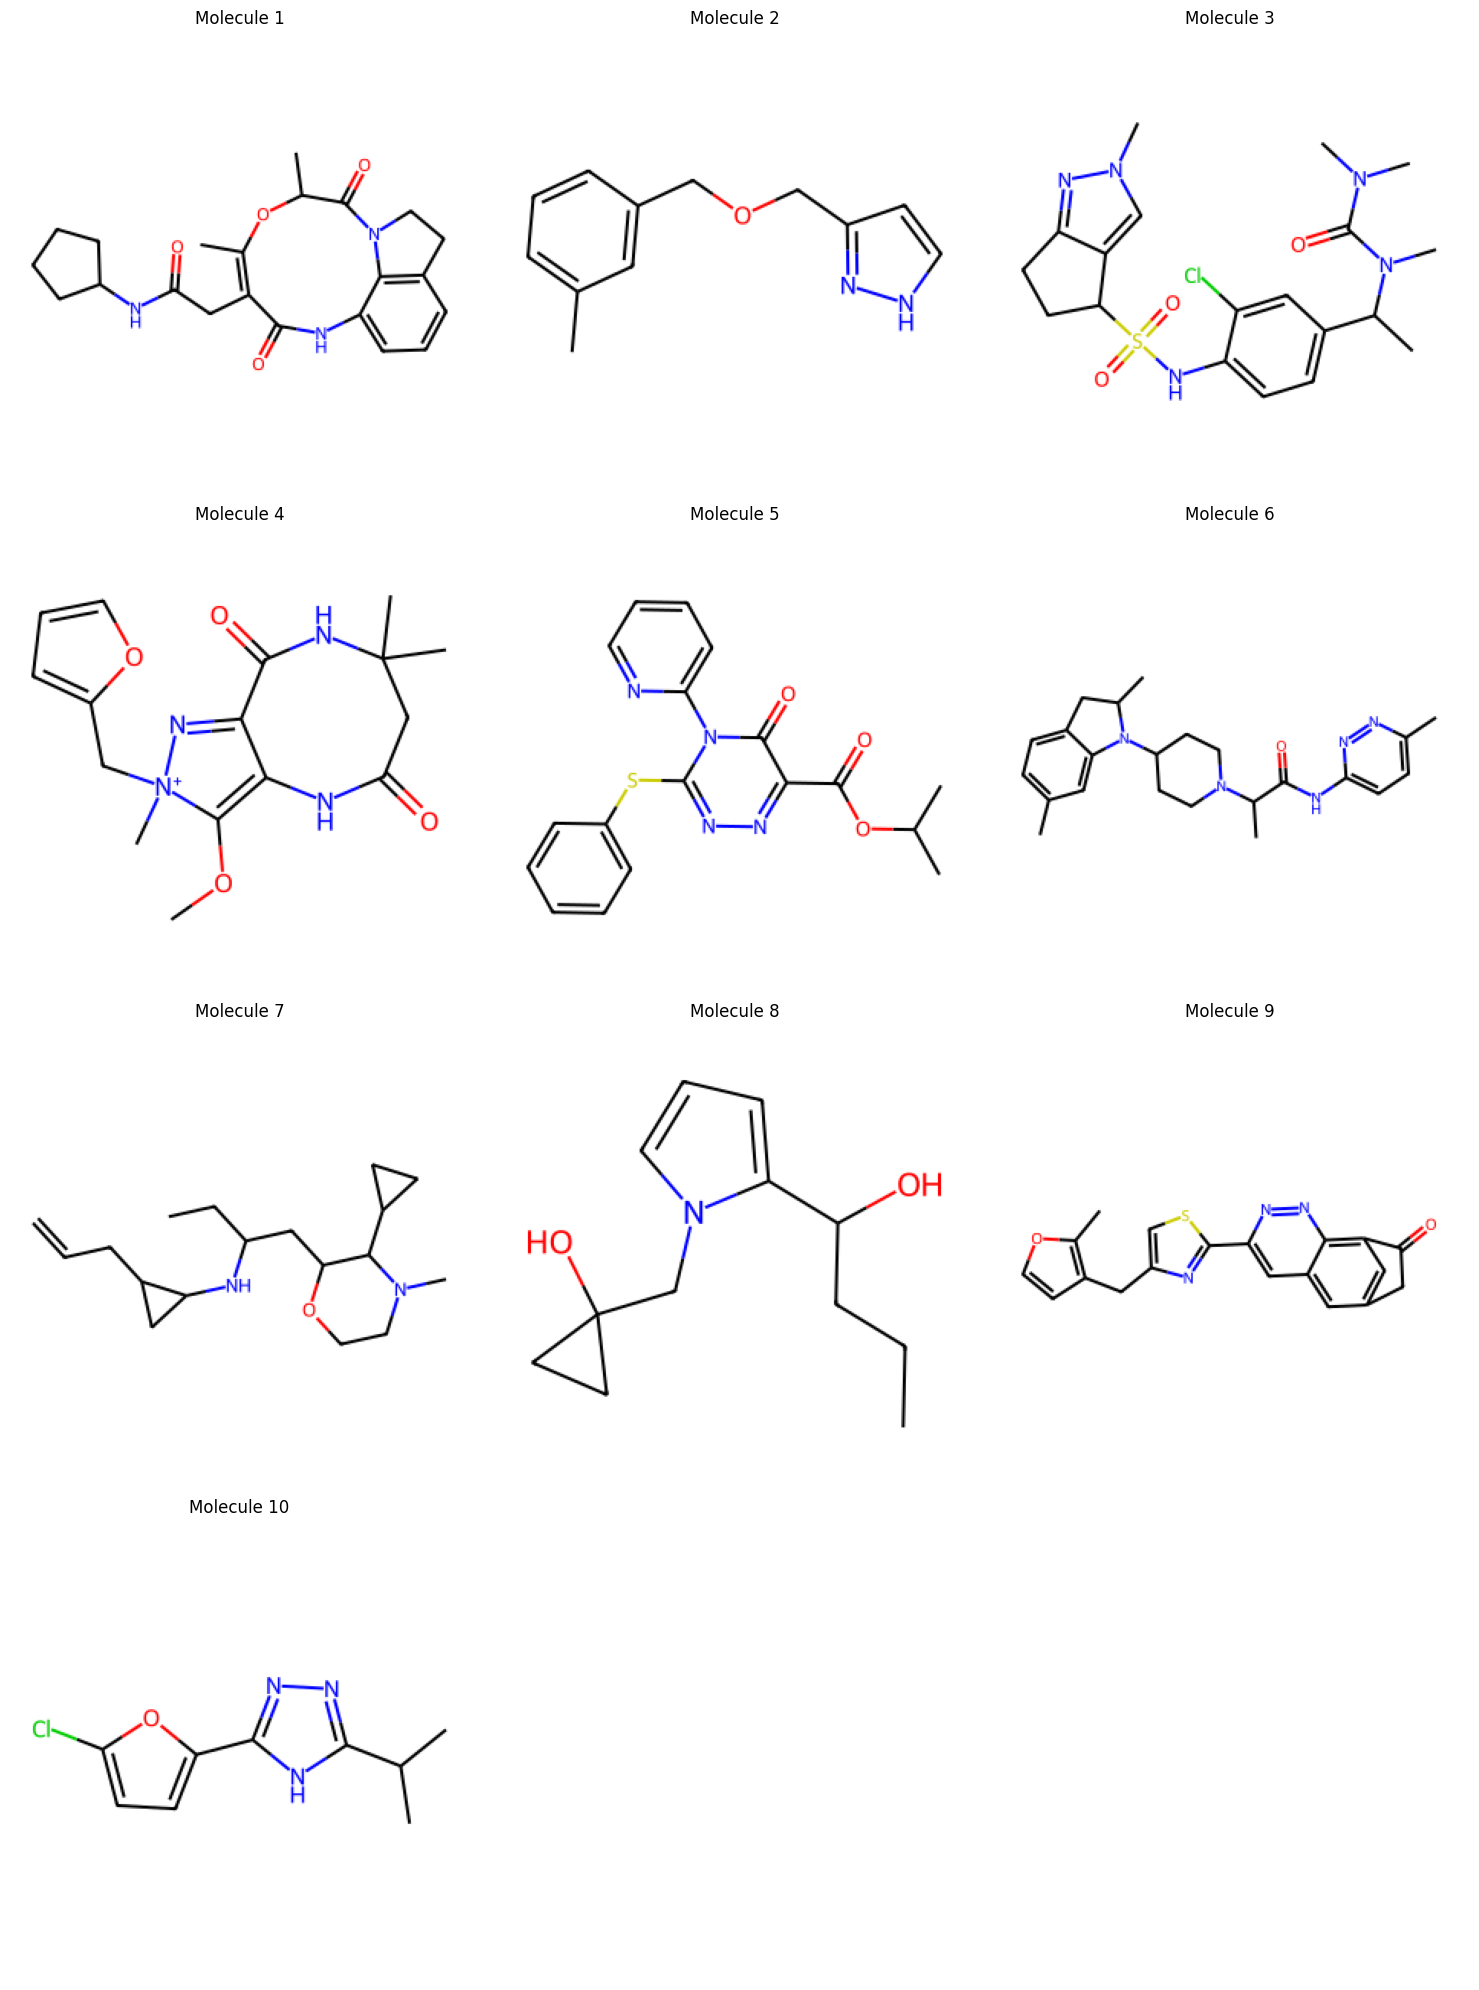

In [ ]:


with open('zinc_pc_ckpt_250.pkl', 'rb') as f:
  data = f.read()
data = data[:10]
# Create subplots
n_molecules = len(data)
n_cols = 3
n_rows = (n_molecules + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

for i, smiles in enumerate(data):
    mol = Chem.MolFromSmiles(smiles)  # Convert SMILES to molecule
    if mol:
        img = Draw.MolToImage(mol, size=(300, 300))  # Generate molecule image
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Molecule {i+1}')
    else:
        axes[i].axis('off')
        axes[i].set_title('Invalid SMILES')

# Hide unused subplot axes
for ax in axes[n_molecules:]:
    ax.axis('off')

plt.tight_layout()
plt.show()
# data[:10]